<a id="num0"></a>
# Оглавление
* [Оглавление](#num0)
* [1. Цели исследования](#num1)
* [2. Ключ к данным](#num2)
* [3. Выгрузка данных и библиотек. Создание вспомогательных функций](#num3)
    * [3.1. Подключение библиотек](#num31)
    * [3.2. Выгрузка данных](#num32)
    * [3.3. Создание пользовательских функций](#num33)
* [4. Первичный анализ данных](#num4)
* [5. Предобработка данных](#num5)
   * [5.1. Нормализация форматов данных](#num51)
   * [5.2. Исследование пропущенных значений](#num52)
   * [5.3. Исследование дубликатов](#num53)
   * [5.4. Обработка выбросов](#num54)
   * [5.5. Трансформация данных](#num55)
   * [5.6. Encoding Categorical Variables](#num56)
   * [5.7. Feature Engineering](#num57)
   * [5.8. Normalization and Scaling](#num58)
   * [5.9. Handling Data Integrity Issues](#num59)
   * [5.10. Data Reduction](#num510)
* [6. Анализ данных](#num6)
    * [6.1. Анализ данных по столбцу employer](#num61)
    * [6.2. Анализ данных по столбцу area](#num62)
    * [6.3. Анализ данных по столбцу experience](#num63)
    * [6.4. Анализ данных по столбцу key_skills](#num64)
    * [6.5. Анализ данных по столбцу schedule](#num65)
    * [6.6. Анализ данных по столбцу employment](#num66)
    * [6.7. Анализ данных по столбцу salary и salary_bin](#num67)
    * [6.8. Анализ данных по столбцу name](#num68)
    * [6.9. Анализ данных по столбцу published_at](#num69)
    * [6.10. Анализ данных по столбцу department](#num610)
    * [6.11. Анализ данных по столбцу type](#num611)
* [7. Выводы](#num7)
* [8. Дополнительная информация. Презентация](#num8)

<a id="num1"></a>
# 1. Цели исследования

В рамках исследования необходимо характерные черты в описаниях вакансиий для Аналитиков данных и специалистов по Data Science для каждой професси, выявить сходство и различия в требования и условиях работы.  

[к Оглавлению](#num0)

<a id="num2"></a>
# 2. Ключ к данным

Файл vacancies_ds.xlsx содержит информацию о выкансиях по профессии дата сайнс,  файл vacancies_da.xlsx содержит информацию о выкансиях по профессии дата аналитик.

Данные представленны следующими параметрами:
* id - уникальный идентификатор вакансии
* name - название вакансии
* published_at - дата и время публикации вакнсии на сайте hh.ru
* alternate_url - ссылка на вакансию на сайте hh.ru
* type - тип вакансии показывает закрыта ли вакансия
* employer - название работодателя
* department - отдел / структурное подразделение работодателя, разместившего вакансию
* area - регион / город вакансии
* experience - требуемый уровень квалификации потенциального работника
* key_skills - ключевые навыки потенциального работника
* schedule - график работы
* employment - тип занятости (полная / частичная)
* description - подробное описание вакансии
* description_lemmatized - лемматизированное (приведеное к базовой форме) описание вакансии
* salary_from - начальное значение вилки заработной платы
* salary_to -конечное значение вилки заработной платы
* salary_bin - группа зарплатного предложения в зависимости от размера заработной платы
* key_skills_from_key_skills_field - данные о ключевых навыков, извлеченные из столбца ``description``
* hard_skills_from_description - данные о хардскилах, извлеченные из столбца ``description``
* soft_skills_from_description - данные о софтскилах, извлеченные из столбца ``description``

[к Оглавлению](#num0)

<a id="num3"></a>
# 3. Выгрузка данных и библиотек

<a id="num31"></a>
## 3.1. Подключение библиотек.

In [266]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
from matplotlib.pyplot import figure
%matplotlib inline
import matplotlib.ticker as ticker
import seaborn as sns
import json
import requests
#import folium
#from folium import Map, Choropleth, Marker, Icon
#from folium.plugins import MarkerCluster
import warnings
from IPython.display import JSON
warnings.filterwarnings('ignore')

[к Оглавлению](#num0)

<a id="num32"></a>
## 3.2. Выгрузка данных

Создадим внешние ссылки и выгрузим данные

In [303]:
# GitHub's interface might have changed since my last update. Let me guide you through the updated process to obtain the raw URL of a file:
# Navigate to the File: Go to your GitHub repository and find the file you want to access.
# Click on the File: Click on the name of the file to view its contents.
# View Raw Option: In the file view, there isn't a specific "Raw" button anymore. Instead, you can right-click anywhere on the page where the file's content is displayed (make sure not to click on any text or code) and select "Copy link address" or "Copy link location" from the context menu. This will copy the raw URL to your clipboard.
# Use the Raw URL: Now you can paste this URL into your Jupyter Notebook or any other application to access the file directly.
# кликаем на имени файла.Открывается окно, по середине ссылка "View raw". Кликаем на ней правой кнопкой -  Копировать адрес ссылки
url_ds = 'https://github.com/kurenovk/DS-DA_vacancies/raw/main/data/vacancies_ds.xlsx'
url_da = 'https://github.com/kurenovk/DS-DA_vacancies/raw/main/data/vacancies_da.xlsx'

Данные о вакансиях на должность датасайнтиста представлены в файле ``vacancies_ds.xlsx``. 

In [304]:
try:
    ds = pd.read_excel('C:/Users/PC/Documents/ЯндексПрактикум/Мастерская/vacancies_ds.xlsx')
except:
    ds = pd.read_excel(url_ds, engine='openpyxl')

Данные о вакансиях на должность датасайнтиста представлены в файле ``vacancies_da.xlsx``. 

In [305]:
try:
    da = pd.read_excel('C:/Users/PC/Documents/ЯндексПрактикум/Мастерская/vacancies_da.xlsx')
except:
    da = pd.read_excel(url_da)

[к Оглавлению](#num0)

<a id="num33"></a>
## 3.3. Создание пользовательских функций

Функции ниже позволят быстрее получать информацию и сократить техническую часть проекта

Функция ``val_norm`` используется для приведения в порядок строковых значений. В результате все значения будут приведены к нижнему регистру, удалены задвоенные пробелы, а так же пробелы в начале и в конце строки

In [216]:
def val_norm (data):
    for column in data.columns:
        if data[column].dtype == object:
            data[column] = data[column].str.lower()
            data[column] = data[column].str.strip()
            data[column] = data[column].replace('  ', ' ')

Функция ``data_dim`` позволяет группировать количество вакансий в зависимости от выбранного признака группировки

In [217]:
def data_dim (data, dimention=[]):
    data_pvt = pd.pivot_table(data, index=dimention, values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
    data_pvt.rename(columns={'id':'Кол-во вакансий'}, inplace=True)
    data_pvt['Доля'] = ((data_pvt['Кол-во вакансий']/len(data))*100).round(2)
    return data_pvt

Функция ``data_dim_top`` позволяет создавать не только сводную таблицу как функция ``data_dim``, но и разбить получившуюся таблицу на топ-н позиций и остальные. Если введенная пользователем топ-н превышает размер сводной таблицы, функция возвращает сводную таблицу целиком

In [218]:
def data_dim_top (data, top, dimention=[]):
    data_pvt = pd.pivot_table(data, index=dimention, values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
    data_pvt.rename(columns={'id':'Кол-во вакансий'}, inplace=True)
    data_pvt['Доля'] = ((data_pvt['Кол-во вакансий']/len(data))*100).round(2)
    if top >= len(data_pvt):
        return data_pvt
    else:
        top_n = top-1
        top_rows = data_pvt.nlargest(top_n, 'Кол-во вакансий')
        other_rows = pd.DataFrame({dimention[0]: ['Прочие'], 'Кол-во вакансий': [data_pvt['Кол-во вакансий'].iloc[top_n:].sum()], 'Доля': [data_pvt['Доля'].iloc[top_n:].sum()]})
        result = pd.concat([top_rows, other_rows], axis = 0).reset_index()
        result = result.drop('index', axis=1)
        return result

Функция ``ds_plot`` позволяет создавать столбчатую диаграмму для датасайнтистов на основе сводной таблицы, построенной с помощью функций ``data_dim`` или ``data_dim_top``, определенных раньше 

In [219]:
def ds_plot (data_pivot):
    y_name = data_pivot.columns.values.tolist()[0]
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=data_pivot, x='Кол-во вакансий', y=y_name, palette='mako')
    plt.title(f'Распределение вакансий датасайнтистов по признаку {y_name}');

Функция ``da_plot`` позволяет создавать столбчатую диаграмму для аналитиков данных на основе сводной таблицы, построенной с помощью функций ``data_dim`` или ``data_dim_top``, определенных раньше 

In [220]:
def da_plot (data_pivot):
    y_name = data_pivot.columns.values.tolist()[0]
    plt.figure(figsize=(10, 6))
    ax = sns.barplot(data=data_pivot, x='Кол-во вакансий', y=y_name, palette='flare_r')
    plt.title(f'Распределение вакансий аналитиков данных по признаку {y_name}');

### Создать функцию для 2 графиков на субплотах


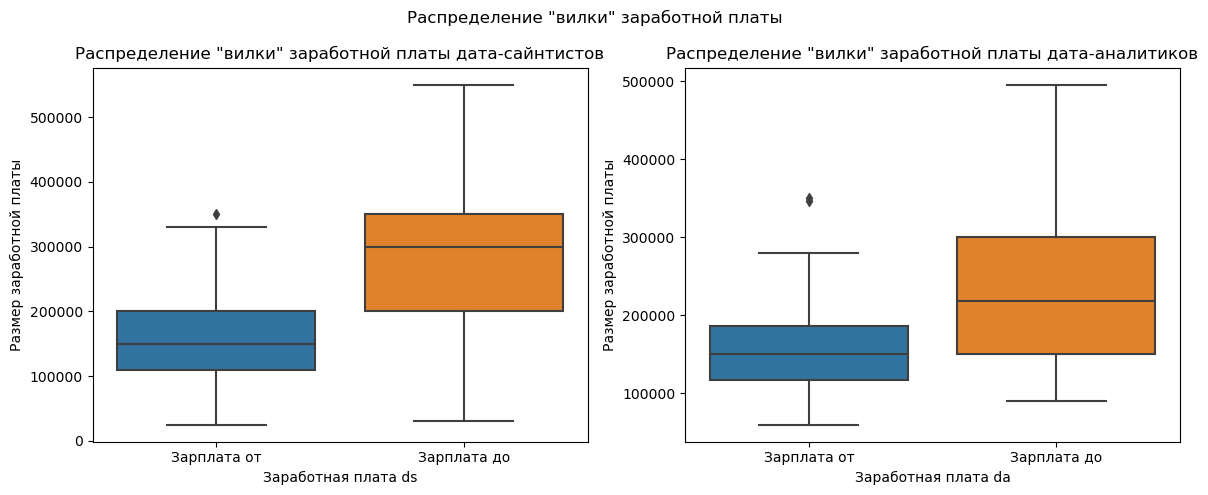

In [221]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Заработная плата ds', y='Размер заработной платы', data=ds_melted, ax=axs[0]).set(title='Распределение "вилки" заработной платы дата-сайнтистов')
plt.title('Распределение "вилки" заработной платы дата-сайнтистов')
sns.boxplot(x='Заработная плата da', y='Размер заработной платы', data=da_melted, ax=axs[1]).set(title='Распределение "вилки" заработной платы дата-аналитиков')
fig.suptitle('Распределение "вилки" заработной платы')
fig.tight_layout()
plt.show();

[к Оглавлению](#num0)

<a id="num4"></a>
# 4. Первичный анализ данных

Ознакомимся с данными. Прежде всего интересует структура данных, общая информация о типах данных, информация о пропусках.

In [222]:
ds.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"Ведущий Data Scientist, Ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,Открытая,Ozon,Ozon Информационные технологии,Москва,Middle (3-6 years),"['IT', 'Разработка поисковых технологий', 'dat...",Удаленная работа,Полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,ЗП не указана,"Python, data science, Разработка поисковых тех...",NaN,NaN
1,78465611,Управляющий директор \ Data Scientist (Сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Middle (3-6 years),"['Оценка рисков', 'Управление рисками', 'MS Po...",Полный день,Полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,ЗП не указана,"Оценка рисков, MS PowerPoint, Статистический а...",NaN,NaN


In [223]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                662 non-null    int64         
 1   name                              662 non-null    object        
 2   published_at                      662 non-null    datetime64[ns]
 3   alternate_url                     662 non-null    object        
 4   type                              662 non-null    object        
 5   employer                          662 non-null    object        
 6   department                        270 non-null    object        
 7   area                              662 non-null    object        
 8   experience                        662 non-null    object        
 9   key_skills                        662 non-null    object        
 10  schedule                          662 non-null    

В файле vacancies_ds.xlsx представлены данные о 662 вакансиях для специалистов дата-сайнс. В данных присутствуют пропуски (особенно много их в столбцах ``salary_from`` и ``salary_to``). Типы данных, на первый взгляд соответствую заявленной информации. Названия столбцов приведены к стандарту. Даже при беглом знакомстве с данными можно сделать вывод, что представленные данные содержат ошибки (например, объявление с id 86018279 содержит в наименовании ваканси Middle \ Senior Data scientist при этом в описании опыта заявлено требование Junior+, что по крайней мере странно)

In [224]:
da.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,Data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,Открытая,Телеком биржа,NaN,Москва,Junior+ (1-3 years),"['HTTP', 'Pandas', 'Linux', 'Git', 'Clickhouse...",Полный день,Полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,ЗП не указана,"SQL, Математическая статистика, Linux, Clickho...",Pandas,NaN
1,85053195,System analyst DWH / Data Analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,Открытая,Axenix (ранее Accenture),NaN,Краснодар,Junior+ (1-3 years),"['DWH', 'Документация', 'Витрины данных', 'Inf...",Удаленная работа,Полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,ЗП не указана,"SQL, DWH, Teradata, Hadoop, Airflow, Greenplum...",NaN,Документация


In [225]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                310 non-null    int64         
 1   name                              310 non-null    object        
 2   published_at                      310 non-null    datetime64[ns]
 3   alternate_url                     310 non-null    object        
 4   type                              310 non-null    object        
 5   employer                          310 non-null    object        
 6   department                        92 non-null     object        
 7   area                              310 non-null    object        
 8   experience                        310 non-null    object        
 9   key_skills                        310 non-null    object        
 10  schedule                          310 non-null    

В файле vacancies_da.xlsx представлены данные о 310 вакансиях для аналитиков данных. В данных присутствуют пропуски (особенно много их в столбцах ``salary_from`` и ``salary_to``). Типы данных, на первый взгляд соответствую заявленной информации. Названия столбцов приведены к стандарту. Даже при беглом знакомстве с данными можно сделать вывод, что представленные данные содержат ошибки. Кроме того, в столбце ``key_skills`` представлены списки с данными о требуемых навыках. При ознакомлении выяснилось, что в некоторых записях этот список пуст. Таким образом, хотя формально в таких записях дынные присутствуют, никакой полезной информации они не несут. Масштаб бедствия выясним в разделе анализа пропусков данных.

<a id="num5"></a>
## 5. Предобработка данных

[к Оглавлению](#num0)

<a id="num51"></a>
## 5.1. Нормализация форматов данных

In [306]:
for column in ds.columns:
    if ds[column].dtype == object:
        ds[column] = ds[column].str.lower()
        ds[column] = ds[column].str.strip()
        ds[column] = ds[column].replace('  ', ' ')
ds.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,67411146,"ведущий data scientist, ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,открытая,ozon,ozon информационные технологии,москва,middle (3-6 years),"['it', 'разработка поисковых технологий', 'dat...",удаленная работа,полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,зп не указана,"python, data science, разработка поисковых тех...",NaN,NaN
1,78465611,управляющий директор \ data scientist (сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,открытая,банк втб (пао),"пао втб, технологический блок",москва,middle (3-6 years),"['оценка рисков', 'управление рисками', 'ms po...",полный день,полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,зп не указана,"оценка рисков, ms powerpoint, статистический а...",NaN,NaN


In [307]:
for column in da.columns:
    if da[column].dtype == object:
        da[column] = da[column].str.lower()
        da[column] = da[column].str.strip()
        da[column] = da[column].replace('  ', ' ')
da.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
0,82978778,data analyst,2024-04-09 10:29:02,https://hh.ru/vacancy/82978778,открытая,телеком биржа,NaN,москва,junior+ (1-3 years),"['http', 'pandas', 'linux', 'git', 'clickhouse...",полный день,полная занятость,"кто мы: servicepipe - команда айтишников, кото...",servicepipe команда айтишник работать рынок иб...,NaN,NaN,зп не указана,"sql, математическая статистика, linux, clickho...",pandas,NaN
1,85053195,system analyst dwh / data analyst,2024-04-08 09:37:50,https://hh.ru/vacancy/85053195,открытая,axenix (ранее accenture),NaN,краснодар,junior+ (1-3 years),"['dwh', 'документация', 'витрины данных', 'inf...",удаленная работа,полная занятость,компания axenix (ранее accenture) продолжает р...,компания axenix ранее accenture продолжать раб...,NaN,NaN,зп не указана,"sql, dwh, teradata, hadoop, airflow, greenplum...",NaN,документация


Добавим в данные колонку в которой содержится дата публикации вакансии

In [308]:
ds['publication_date'] = ds['published_at'].dt.date
da['publication_date'] = (da['published_at']).dt.date

Добавим в данные колонку с навыками, необходимыми для вакансий - с этими данными мы будем экспериментировать

In [309]:
ds['key_skills_edited'] = ds['key_skills']
da['key_skills_edited'] = da['key_skills']

In [310]:
ds.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,publication_date,key_skills_edited
0,67411146,"ведущий data scientist, ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,открытая,ozon,ozon информационные технологии,москва,middle (3-6 years),"['it', 'разработка поисковых технологий', 'dat...",...,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,зп не указана,"python, data science, разработка поисковых тех...",NaN,NaN,2024-04-02,"['it', 'разработка поисковых технологий', 'dat..."
1,78465611,управляющий директор \ data scientist (сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,открытая,банк втб (пао),"пао втб, технологический блок",москва,middle (3-6 years),"['оценка рисков', 'управление рисками', 'ms po...",...,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,зп не указана,"оценка рисков, ms powerpoint, статистический а...",NaN,NaN,2024-04-27,"['оценка рисков', 'управление рисками', 'ms po..."


# ---------------------- придется отложить то что снизу

### Проблема с обработкой значений в столбце 'key_skills' едитед в следующем. 
1) Есть приличное количество пропусков в виде [], которое нужно заполнять из столбца с описанием
2) В столбце key_skills встречаются дублирования, орфографические ошибки и т.п., которые после заполнения пропусков только увеличатся. Их придется ручками заменять

Видимо лучше работать именно в такой последовательности, чтоб двойную работу не делать

In [98]:
ds_exploded = ds.loc[ds['key_skills'] != '[]', 'key_skills'].reset_index()
ds_exploded = ds_exploded['key_skills'].str.split(', ').explode().reset_index()
ds_exploded.drop('index', axis= 1 , inplace= True )
ds_exploded = ds_exploded.rename(columns={'key_skills':'Стек датасайнтиста'}) 
ds_exploded['Стек датасайнтиста']= ds_exploded['Стек датасайнтиста'].str.replace('[', '')
ds_exploded['Стек датасайнтиста']= ds_exploded['Стек датасайнтиста'].str.replace(']', '')
ds_exploded['Стек датасайнтиста']= ds_exploded['Стек датасайнтиста'].str.replace("'", '')
ds_exploded['Стек датасайнтиста']= ds_exploded['Стек датасайнтиста'].str.strip()
ds_exploded['Стек датасайнтиста']= ds_exploded['Стек датасайнтиста'].str.lower()
ds_exploded['Стек датасайнтиста'].unique().tolist()

['it',
 'разработка поисковых технологий',
 'data science',
 'python',
 'оценка рисков',
 'управление рисками',
 'ms powerpoint',
 'pd',
 'lgd',
 'ead',
 'портфельные риски',
 'статистический анализ',
 'кредитные риски',
 'математическое моделирование',
 'sql',
 'machine learning',
 'public speaking',
 'writing articles',
 'research',
 'юнит-экономика',
 'information technology',
 'data mining',
 'fluent english',
 'презентация результатов',
 'php',
 'spark',
 'базы данных',
 'elastic search',
 'scala',
 'typescript',
 'mysql',
 'clickhouse',
 'документация',
 'r',
 'креативность',
 'математический анализ',
 'коммуникация',
 'big data',
 'ml',
 'confluence',
 'hadoop',
 'dl',
 'pandas',
 'pytorch',
 'tensorflow',
 'sklearn',
 'keras',
 'numpy',
 'ffmpeg',
 'soxi',
 'kaldi',
 'librosa',
 'nlp',
 'обучение модели',
 'cv',
 'нейронная сеть',
 'машинное обучение',
 'computer vision',
 'linux',
 'ci\\\\cd',
 'субд',
 'ds',
 'generative design',
 'gd',
 'генеративный дизайн',
 'mle',
 'deep 

In [99]:
da_exploded = da.loc[ds['key_skills'] != '[]', 'key_skills'].reset_index()
da_exploded = da_exploded['key_skills'].str.split(', ').explode().reset_index()
da_exploded.drop('index', axis= 1 , inplace= True )
da_exploded = ds_exploded.rename(columns={'key_skills':'Стек датасайнтиста'}) 
da_exploded['Стек датасайнтиста']= da_exploded['Стек датасайнтиста'].str.replace('[', '')
da_exploded['Стек датасайнтиста']= da_exploded['Стек датасайнтиста'].str.replace(']', '')
da_exploded['Стек датасайнтиста']= da_exploded['Стек датасайнтиста'].str.replace("'", '')
da_exploded['Стек датасайнтиста']= da_exploded['Стек датасайнтиста'].str.strip()
da_exploded['Стек датасайнтиста']= da_exploded['Стек датасайнтиста'].str.lower()
da_exploded['Стек датасайнтиста'].tolist()

['it',
 'разработка поисковых технологий',
 'data science',
 'python',
 'оценка рисков',
 'управление рисками',
 'ms powerpoint',
 'pd',
 'lgd',
 'ead',
 'портфельные риски',
 'статистический анализ',
 'кредитные риски',
 'математическое моделирование',
 'sql',
 'machine learning',
 'public speaking',
 'writing articles',
 'research',
 'юнит-экономика',
 'information technology',
 'data mining',
 'fluent english',
 'machine learning',
 'public speaking',
 'презентация результатов',
 'writing articles',
 'research',
 'юнит-экономика',
 'information technology',
 'data mining',
 'fluent english',
 'machine learning',
 'public speaking',
 'презентация результатов',
 'writing articles',
 'research',
 'юнит-экономика',
 'information technology',
 'data mining',
 'fluent english',
 'php',
 'spark',
 'базы данных',
 'python',
 'elastic search',
 'scala',
 'typescript',
 'mysql',
 'clickhouse',
 'sql',
 'документация',
 'r',
 'python',
 'креативность',
 'математический анализ',
 'коммуникация'

# ---------------------- придется отложить то что сверху

[к Оглавлению](#num0)

<a id="num52"></a>
## 5.2. Исследование пропущенных значений

В датасете ``ds`` - 662 строки. Выясним в каких столбцах есть пропуски и как их много. Найдем процент отсутствующих значений в каждом из столбцов датасета.
Посмотрим так же сколько пустых списков в столбце  ``key_skills``

In [230]:
((ds.isna().sum() / len(ds)).round(4)*100).sort_values(ascending=False)

salary_from                         91.99
salary_to                           91.54
soft_skills_from_description        70.69
department                          59.21
hard_skills_from_description        53.47
key_skills_from_key_skills_field    46.98
id                                   0.00
employment                           0.00
salary_bin                           0.00
description_lemmatized               0.00
description                          0.00
schedule                             0.00
name                                 0.00
key_skills                           0.00
experience                           0.00
area                                 0.00
employer                             0.00
type                                 0.00
alternate_url                        0.00
published_at                         0.00
key_skills_edited                    0.00
dtype: float64

In [231]:
(ds.loc[ds['key_skills'] == '[]', 'key_skills'].count()/len(ds)).round(4)*100

17.82

In [232]:
ds.loc[ds['key_skills'] == '[]'].head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,key_skills_edited
19,89761049,data scientist / cv researcher (middle+/senior),2024-04-20 08:49:05,https://hh.ru/vacancy/89761049,открытая,филиал в г. санкт-петербург ао концерн радиост...,NaN,санкт-петербург,middle (3-6 years),[],...,полная занятость,"мы - современная, активно развивающаяся компан...",современный активно развивающийся компания спе...,200000.0,NaN,зп не указана,NaN,NaN,NaN,[]
28,90735443,data scientist,2024-03-04 17:17:17,https://hh.ru/vacancy/90735443,открытая,faberlic,NaN,москва,junior+ (1-3 years),[],...,полная занятость,в ооо &quot;эксперт&quot; открыта позиция data...,quot эксперт quot открывать позиция data scien...,NaN,NaN,зп не указана,NaN,NaN,NaN,[]


* Практически нет данных по заработной плате - менее 10% строк содержат эту информацию.
* 70.69% столбца ``soft_skills_from_description`` и 53.47% столбца ``hard_skills_from_description`` пусты.
* Почти 50% позиций не содержат данные в столбце ``key_skills_from_key_skills_field``. И хотя столбец ``key_skills`` формально не содержит пропусков (заполнено 100%), 17.82% данных - пустые списки без полезной информации. Пока рабочая гипотеза состоит в том, что работать нужно со столбцом ``key_skills``. Недостающую информацию следует попытаться получить из столбца ``description``.
* Не содержат информацию 59.21% записей в столбце ``department``, но ценность этой информации не велика.

В датасете ``da`` - 310 строк. Выясним в каких столбцах есть пропуски и как их много. Найдем процент отсутствующих значений в каждом из столбцов датасета.
Посмотрим так же сколько пустых списков в столбце  ``key_skills``

In [233]:
((da.isna().sum() / len(da)).round(4)*100).sort_values(ascending=False)

salary_to                           91.94
salary_from                         90.97
soft_skills_from_description        72.26
department                          70.32
hard_skills_from_description        63.87
key_skills_from_key_skills_field    39.68
id                                   0.00
employment                           0.00
salary_bin                           0.00
description_lemmatized               0.00
description                          0.00
schedule                             0.00
name                                 0.00
key_skills                           0.00
experience                           0.00
area                                 0.00
employer                             0.00
type                                 0.00
alternate_url                        0.00
published_at                         0.00
key_skills_edited                    0.00
dtype: float64

In [234]:
(da.loc[da['key_skills'] == '[]', 'key_skills'].count()/len(da)).round(4)*100

19.68

Ситуация с пропусками в датасете da похожая:
* Практически нет данных по заработной плате - менее 10% строк содержат эту информацию.
* 72.26% столбца ``soft_skills_from_description`` и 63.87% столбца ``hard_skills_from_description`` пусты.
* Почти 40% позиций не содержат данные в столбце ``key_skills_from_key_skills_field``. И хотя столбец ``key_skills`` формально не содержит пропусков, 19.68% данных - пустые списки без полезной информации. Пока рабочая гипотеза состоит в том, что работать нужно со столбцом ``key_skills``
* Не содержат информацию 70.32% записей в столбце ``department``, но ценность этой информации не велика.

# ------------------------------------------------

# Будем ли заменять значения или удалим строки с пропусками?

In [105]:
#text_col = [''список колонок с текстовыми данными']
#num_col = ['список колонок с цифровыми данными']
#for i in text_col:
#    data[i] = data[i].fillna('нет данных')
#for i in num_col:
#    data[i] = data[i].fillna(0)

# ------------------------------------------------

[к Оглавлению](#num0)

<a id="num53"></a>
## 5.3. Исследование дубликатов

Проверим датасеты на наличие дубликатов. Кроме того, проанализируем наличие дубликатов в столбце ``id``

In [28]:
ds.duplicated().sum()

0

In [29]:
da.duplicated().sum()

0

Полные дубликаты отсутствуют в обоих датафреймах.

[к Оглавлению](#num0)

<a id="num521"></a>
### 5.2.1. Исследование дубликатов в столбце 'id'

In [30]:
ds.duplicated(subset=['id'], keep= False).sum()

0

In [31]:
da.duplicated(subset=['id'], keep= False).sum()

0

Дубликаты в столбце 'id' отсутствуют в обоих датафреймах.

[к Оглавлению](#num0)

<a id="num522"></a>
### 5.2.2. Исследование дубликатов в столбце ''key_skills''

In [32]:
ds.duplicated(subset=['key_skills'], keep= False).sum()

434

In [33]:
ds.loc[ds['key_skills'] == '[]', 'key_skills'].count()

118

Очень большое количество пустых списков - 118, однако есть и непустые объявления написанные как под копирку. Мы уже выяснили, что дубликаты в столбце ``id`` отсутствуют. Значит ситсема воспринимает эти объявления как разные. 
Выделим сабсет данных, не содержащих пустые списки в столбце ``key_skills`` - на данном этапе назвать их дубликатами нельзя

In [236]:
ds_listnotempty = ds.loc[ds['key_skills'] != '[]']
ds_listnotempty.head(2)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,key_skills_edited
0,67411146,"ведущий data scientist, ранжирование поиска",2024-04-02 11:20:17,https://hh.ru/vacancy/67411146,открытая,ozon,ozon информационные технологии,москва,middle (3-6 years),"['it', 'разработка поисковых технологий', 'dat...",...,полная занятость,у нас петабайты реальных логов событий пользов...,петабайт реальный лог событие пользователь воз...,NaN,NaN,зп не указана,"python, data science, разработка поисковых тех...",NaN,NaN,"['it', 'разработка поисковых технологий', 'dat..."
1,78465611,управляющий директор \ data scientist (сопрово...,2024-04-27 10:10:12,https://hh.ru/vacancy/78465611,открытая,банк втб (пао),"пао втб, технологический блок",москва,middle (3-6 years),"['оценка рисков', 'управление рисками', 'ms po...",...,полная занятость,наша команда контроля и управления моделями яв...,наш команда контроль управление модель являтьс...,NaN,NaN,зп не указана,"оценка рисков, ms powerpoint, статистический а...",NaN,NaN,"['оценка рисков', 'управление рисками', 'ms po..."


In [36]:
ds_listnotempty.loc[ds_listnotempty.duplicated(['name', 'employer', 'area', 'key_skills', 'experience'], keep=False), 
       ['published_at', 'name', 'employer', 'area', 'key_skills', 'experience']].sort_values(by=['key_skills', 'published_at'])

,published_at,name,employer,area,key_skills,experience
108,2024-03-18 12:43:53,senior data scientist (rec. system),okko,москва,"['confluence', 'python', 'ml', 'deep learning'...",middle (3-6 years)
641,2024-04-26 08:30:06,senior data scientist (rec. system),okko,москва,"['confluence', 'python', 'ml', 'deep learning'...",middle (3-6 years)
342,2024-03-26 11:22:03,"data scientist, маркетплейс, контент и товары",ozon,москва,"['confluence', 'ит', 'python', 'it', 'pytorch']",junior+ (1-3 years)
635,2024-04-25 12:45:30,"data scientist, маркетплейс, контент и товары",ozon,москва,"['confluence', 'ит', 'python', 'it', 'pytorch']",junior+ (1-3 years)
96,2024-03-07 12:45:23,data scientist (scoring),билайн,москва,['confluence'],junior+ (1-3 years)
...,...,...,...,...,...,...
240,2024-03-15 13:51:00,data scientist (центр модельных рисков сервисн...,сбер,санкт-петербург,['юнит-экономика'],junior+ (1-3 years)
280,2024-03-19 17:52:00,senior data scientist (розничное риск-моделиро...,сбер,москва,['юнит-экономика'],middle (3-6 years)
524,2024-04-15 17:22:53,"data scientist (центр модельных рисков киб, nl...",сбер,москва,['юнит-экономика'],junior+ (1-3 years)
546,2024-04-17 15:56:00,data scientist (центр модельных рисков сервисн...,сбер,санкт-петербург,['юнит-экономика'],junior+ (1-3 years)


In [37]:
da.loc[da['key_skills'] == '[]', 'key_skills'].count()

61

В столбце ``key_skills`` в данных о вакансиях для дата аналитиков 61 пустой список

[к Оглавлению](#num0)

<a id="num523"></a>
### 5.2.3. Исследование неявных дубликатов в столбце ''key_skills_edited''

Столбец 'key_skills_edited' является точной копией столбца 'key_skills', который мы уже исследовали на наличе дубликатов. В столбце 'key_skills_edited' много неявных дубликатов. Самые распространенные - написания навыков на английском и русском языках. Постараемся избавиться от неявных дубликатов

In [311]:
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['ms excel', 'эксель'], 'excel', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('ms powerpoint', 'powerpoint', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['машинное обучение', 
                                                           'ml', 
                                                           'обучение модели', 
                                                           'ml/dl', 
                                                           'ml-алгоритмы', 
                                                           'ml-моделирование',
                                                           'ai/ml',
                                                           'classic ml',
                                                          'нейронная сеть', 
                                                          'neural nets', 
                                                           'нейросети', 
                                                           'nn'], 
                                                          'machine learning', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['gd','генеративный дизайн'], 'generative design', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['информационные технологии', 
                                                           'information technology', 
                                                           'ит-системы'], 'it', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('dl', 'deep learning', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['ds', 'data-science'], 'data science', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['pd','пандас'], 'pandas', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['mysql',
                                                           'postgresql', 
                                                           'oracle pl/sql', 
                                                           'субдд: ms sql postgresql oracle',
                                                          'ms sql', 
                                                           'ms sql server', 
                                                           'mssql', 
                                                           'transact-sql'], 'sql', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['sklearn', 'scikit learn'], 'scikit-learn', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('airflow', 'apache airflow', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['искусственный интеллект', 
                                                           'ии', 
                                                           'openai', 
                                                           'chatgpt', 
                                                           'gpt',], 'ai', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['субд', 
                                                           'работа с базами данных', 
                                                           'принципы работы бд', 
                                                           'cистемы управления базами данных'], 'базы данных', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['cv', 
                                                           'computervision', 
                                                           'image classification',
                                                           'image segmentation',], 'computer vision', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['ооп', 
                                                           'алгоритмы и структуры данных', 
                                                           'алгоритмы', 
                                                           'разработка'], 'разработка по', regex=True)
#ds['key_skills_edited'] = ds['key_skills_edited'].replace(['data scientist', ], 'apache airflow', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['аналитик', 
                                                           'аналитика', 
                                                           'аналитические исследования', 
                                                           'сбор и анализ информации', 
                                                           'time series analysis', 
                                                           'анализ временных рядов', 
                                                           'etl', 
                                                           'анализ данных', 
                                                           'time series'],  'data analysis', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['a/b', 
                                                           'a/b тесты', 
                                                           'ав-тестирование', 
                                                           'a/b-experiments', 
                                                           'a/b тестирование тестирование'], 'a/b тестирование', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['nlu', 
                                                           'nlp модели', 
                                                           'nlp', 
                                                           'llm'], 'natural language processing', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['оценка рисков', 
                                                           'портфельные риски', 
                                                           'кредитные риски', 
                                                           'модельный риск', 
                                                           'анализ рисков'], 'управление рисками', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['public speaking', 
                                                           'презентация результатов', 
                                                           'публичные выступления'], 'проведение презентаций', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['ltv prediction', 'churn prediction'], 'аналитика продаж', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['документация','оформление описаний'], 'оформление документаци', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['организаторские навыки',
                                                           'мотивация персонала'], 'управленческие навыки', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['высокие коммуникативные навыки', 
                                                           'коммуникабельность', 
                                                           'коммуникация', 
                                                           'деловая коммуникация'], 'коммуникативные навыки', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('confluence', 'atlassian confluence', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['fluent english','english'], 'английский язык', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['математическая статистика',
                                                           'статистика',
                                                           'теория вероятностей',
                                                           'mathematical statistics',
                                                           'статистический анализ', 
                                                           'statsmodels'],'математическая статистика и теория вероятностей', regex=True)

ds['key_skills_edited'] = ds['key_skills_edited'].replace(['математическая математическая статистика и математическая статистика и теория вероятностей и математическая статистика и теория вероятностей', 
'математическая математическая статистика и теория вероятностей и теория вероятностей'], 'математическая статистика и теория вероятностей', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['понимание задач регрессии',
                                                           'linear regression'],'регрессионный анализ', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['seaborn',
                                                           'plotly',
                                                           'matploblib&seaborn',
                                                           'matplotlib',
                                                           'sns', 
                                                           'matplotlib/plotly'], 'matplotlib, seaborn, plotly', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('pyton', 'python', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('аналитический склад ума', 'аналитическое мышление', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('elastic search', 'elasticsearch', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('ci\\\\cd', 'ci/cd', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace('jira', 'atlassian jira', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['работа в команде', 
                                                           'умение работать в коллективе'],'умение работать в команде', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['dashboards', 'дашборд'],'создание дашбордов', regex=True)


In [312]:
da['key_skills_edited'] = da['key_skills_edited'].replace(['ms excel', 'эксель'], 'excel', regex=True)

da['key_skills_edited'] = da['key_skills_edited'].replace(['информацai'], 'информации', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['power bi', 'powerbi', 'ms powerbi'], 'ms power bi', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('ms powerpoint', 'powerpoint', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['машинное обучение', 
                                                           'ml', 
                                                           'обучение модели', 
                                                           'ml/dl', 
                                                           'ml-алгоритмы', 
                                                           'ml-моделирование',
                                                           'ai/ml',
                                                           'classic ml',
                                                          'нейронная сеть', 
                                                          'neural nets', 
                                                           'нейросети', 
                                                           'nn', 
                                                           'umachine learning'], 
                                                          'machine learning', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['gd','генеративный дизайн'], 'generative design', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['информационные технологии', 
                                                           'information technology', 
                                                           'ит-системы', 
                                                           'продвинутый пользователь пк'], 'it', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('dl', 'deep learning', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['ds', 
                                                           'data-science', 
                                                           'ddata science'], 'data science', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['pd','пандас'], 'pandas', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['mysql',
                                                           'postgresql', 
                                                           'oracle pl/sql', 
                                                           'субдд: ms sql postgresql oracle',
                                                          'ms sql', 
                                                           'ms sql server', 
                                                           'mssql', 
                                                           'transact-sql', 
                                                           'sql server', 
                                                           'postgres'], 'sql', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['sklearn', 'scikit learn'], 'scikit-learn', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('airflow', 'apache airflow', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['искусственный интеллект', 
                                                           'ии', 
                                                           'openai', 
                                                           'chatgpt', 
                                                           'gpt',], 'ai', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['субд', 
                                                           'работа с базами данных', 
                                                           'принципы работы бд', 
                                                           'cистемы управления базами данных'], 'базы данных', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['cv', 
                                                           'computervision', 
                                                           'image classification',
                                                           'image segmentation',], 'computer vision', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['ооп', 
                                                           'алгоритмы и структуры данных', 
                                                           'алгоритмы', 
                                                           'разработка', 
                                                           'devops'], 'разработка по', regex=True)
#da['key_skills_edited'] = da['key_skills_edited'].replace(['data scientist', ], 'apache airflow', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['аналитик', 
                                                           'аналитика', 
                                                           'аналитические исследования', 
                                                           'сбор и анализ информации', 
                                                           'time series analysis', 
                                                           'анализ временных рядов', 
                                                           'etl', 
                                                           'анализ данных', 
                                                           'time series', 
                                                           'сбор и анализ информацai', 
                                                           'ad hoc analysis'],  'data analysis', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['a/b', 
                                                           'a/b тесты', 
                                                           'ав-тестирование', 
                                                           'a/b-experiments', 
                                                           'a/b тестирование тесты', 
                                                           'a/b тестирование тестирование'], 'a/b тестирование', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['nlu', 
                                                           'nlp модели', 
                                                           'nlp', 
                                                           'llm'], 'natural language processing', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['оценка рисков', 
                                                           'портфельные риски', 
                                                           'кредитные риски', 
                                                           'модельный риск', 
                                                           'анализ рисков'], 'управление рисками', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['public speaking', 
                                                           'презентация результатов', 
                                                           'публичные выступления', 
                                                           'навыки презентацai'], 'проведение презентаций', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['ltv prediction', 
                                                           'churn prediction', 
                                                           'data analysisа продаж', 
                                                           'маркетинговый анализ', 
                                                           'конкурентная data analysisа',], 'аналитика продаж и маркетинга', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['документация','оформление описаний'], 'оформление документаци', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['организаторские навыки',
                                                           'мотивация персонала'], 'управленческие навыки', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['высокие коммуникативные навыки', 
                                                           'коммуникабельность', 
                                                           'коммуникация', 
                                                           'деловая коммуникация', 
                                                           'деловая коммуникативные навыки'], 'коммуникативные навыки', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('confluence', 'atlassian confluence', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['fluent english','english'], 'английский язык', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['математическая статистика',
                                                           'статистика',
                                                           'теория вероятностей',
                                                           'mathematical statistics',
                                                           'статистический анализ', 
                                                           'statsmodels'],
                                                          'математическая статистика и теория вероятностей', regex=True)
ds['key_skills_edited'] = ds['key_skills_edited'].replace(['математическая математическая статистика и математическая статистика и теория вероятностей и математическая статистика и теория вероятностей', 
'математическая математическая статистика и теория вероятностей и теория вероятностей'], 'математическая статистика и теория вероятностей', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['понимание задач регрессии',
                                                           'linear regression'],'регрессионный анализ', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['seaborn',
                                                           'plotly',
                                                           'matploblib&seaborn',
                                                           'matplotlib',
                                                           'sns', 
                                                           'matplotlib/plotly'], 'matplotlib, seaborn, plotly', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('pyton', 'python', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('аналитический склад ума', 'аналитическое мышление', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('elastic search', 'elasticsearch', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('ci\\\\cd', 'ci/cd', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace('jira', 'atlassian jira', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['работа в команде', 
                                                           'умение работать в коллективе'],'умение работать в команде', regex=True)
da['key_skills_edited'] = da['key_skills_edited'].replace(['dashboards', 'дашборд'],'создание дашбордов', regex=True)

[к Оглавлению](#num0)

<a id="num523"></a>
### 5.2.3. Исследование дубликатов в столбце ''description''

Здесь смотрим про дубликаты https://www.codecamp.ru/blog/pandas-find-duplicates/

In [280]:
ds.duplicated(subset=['description'], keep= False).sum()

173

In [281]:
dupldescript = ds.loc[ds.duplicated(['description']), ['description', 'published_at']]
dupldescript.sort_values(by =['description'])

,description,published_at
370,&quot;юнилевер русь&quot; по всему миру создаю...,2024-04-15 12:23:46
54,"1221systems – аккредитованная it-компания, спе...",2024-03-29 13:00:03
55,"1221systems – аккредитованная it-компания, спе...",2024-03-29 13:00:04
419,"1221systems – аккредитованная it-компания, спе...",2024-04-09 15:39:48
325,"1221systems – аккредитованная it-компания, спе...",2024-03-29 13:00:17
...,...,...
580,"чем предстоит заниматься: разработка, сопрово...",2024-04-22 09:51:00
553,чем предстоит заниматься: руководством команд...,2024-04-18 12:35:12
455,чем предстоит заниматься: создание и оптимиза...,2024-04-08 13:25:17
454,чем предстоит заниматься: создание и оптимиза...,2024-04-08 13:25:17


In [282]:
#ds.loc[ds['id'].isin([455, 454])]
#df.loc[df['col1']. isin([value1, value2, value3, ...])]
#df.iloc [[2, 3, 4]]
ds.iloc[[455, 454]]

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,publication_date,key_skills_edited
455,96420465,data scientist,2024-04-08 13:25:17,https://hh.ru/vacancy/96420465,открытая,ростелеком,NaN,краснодар,junior+ (1-3 years),"['data analysis', 'анализ данных', 'ms sql', '...",...,чем предстоит заниматься: создание и оптимиза...,предстоять заниматься создание оптимизация про...,NaN,130000.0,от 100 тысяч до 200 тысяч,"sql, python, анализ данных, apache airflow, gi...",NaN,NaN,2024-04-08,"['data analysis', 'data analysis', 'sql', 'git..."
454,96420464,data scientist,2024-04-08 13:25:17,https://hh.ru/vacancy/96420464,открытая,ростелеком,NaN,казань,junior+ (1-3 years),"['data analysis', 'анализ данных', 'ms sql', '...",...,чем предстоит заниматься: создание и оптимиза...,предстоять заниматься создание оптимизация про...,NaN,130000.0,от 100 тысяч до 200 тысяч,"sql, python, анализ данных, apache airflow, gi...",NaN,NaN,2024-04-08,"['data analysis', 'data analysis', 'sql', 'git..."


### Вот и не понятно. Если описание повторяется слово в слово, но для разных городов или разных дат - это одно объявление или они реально ищут количество людей соответствующее количеству объявлений

In [111]:
ds.duplicated(subset=['published_at', 'employer', 'description'], keep= False).sum()

37

[к Оглавлению](#num0)

<a id="num524"></a>
### 5.2.4. Исследование дубликатов в прочих столбцах

Исследование дубликатов в прочих столбцах не имет смысла, так как данные в них либо предполагают ненлевую вероятность наличия дубликатов, либо эти столбцы являются производными из рассмотреных нами ранее.

[к Оглавлению](#num0)

<a id="num54"></a>
## 5.4. Обработка выбросов

Цифровые данные содержатся только в столбцах 'salary_from' и 'salary_to'. Рассмотрим их на наличие выбросов

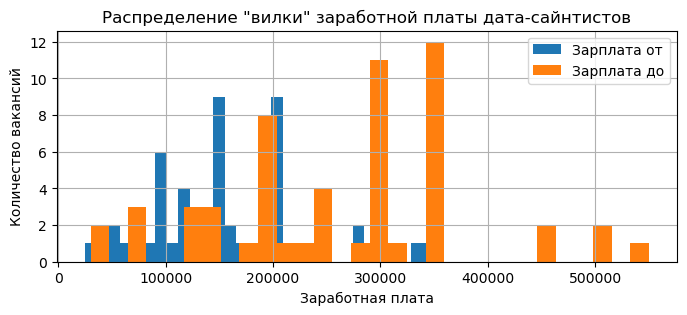

In [112]:
fig, axs = plt.subplots(figsize=(8, 3))
ds['salary_from'].hist(bins=30)
ds['salary_to'].hist(bins=30)
plt.title('Распределение "вилки" заработной платы дата-сайнтистов')
plt.xlabel('Заработная плата')
plt.ylabel('Количество вакансий')
plt.legend(['Зарплата от', 'Зарплата до'])
plt.show();

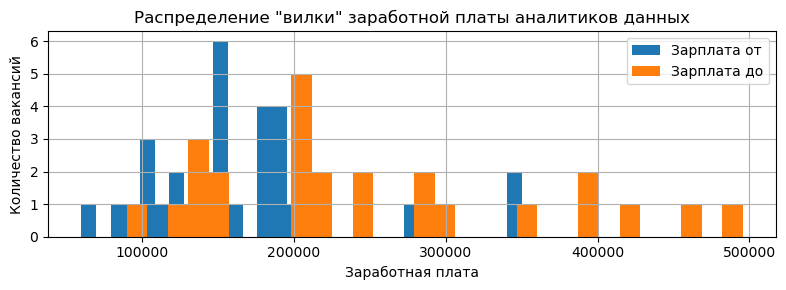

In [113]:
fig, axs = plt.subplots(figsize=(8, 3))
da['salary_from'].hist(bins=30)
da['salary_to'].hist(bins=30)
plt.title('Распределение "вилки" заработной платы аналитиков данных')
plt.xlabel('Заработная плата')
plt.ylabel('Количество вакансий')
plt.legend(['Зарплата от', 'Зарплата до'])
fig.tight_layout()
plt.show();

In [114]:
ds_melted = pd.melt(ds, 
                    id_vars = 'id', 
                    value_vars=['salary_from', 'salary_to'], 
                    var_name='Заработная плата ds', 
                    value_name='Размер заработной платы')
ds_melted.loc[ds_melted['Заработная плата ds'] ==  'salary_from', 'Заработная плата ds'] = 'Зарплата от'
ds_melted.loc[ds_melted['Заработная плата ds'] ==  'salary_to', 'Заработная плата ds'] = 'Зарплата до'
ds_melted.head(2)

,id,Заработная плата ds,Размер заработной платы
0,67411146,Зарплата от,NaN
1,78465611,Зарплата от,NaN


In [115]:
da_melted = pd.melt(da, 
                    id_vars = 'id', 
                    value_vars=['salary_from', 'salary_to'], 
                    var_name='Заработная плата da', 
                    value_name='Размер заработной платы')
da_melted.loc[da_melted['Заработная плата da'] ==  'salary_from', 'Заработная плата da'] = 'Зарплата от'
da_melted.loc[da_melted['Заработная плата da'] ==  'salary_to', 'Заработная плата da'] = 'Зарплата до'
da_melted.head(2)

,id,Заработная плата da,Размер заработной платы
0,82978778,Зарплата от,NaN
1,85053195,Зарплата от,NaN


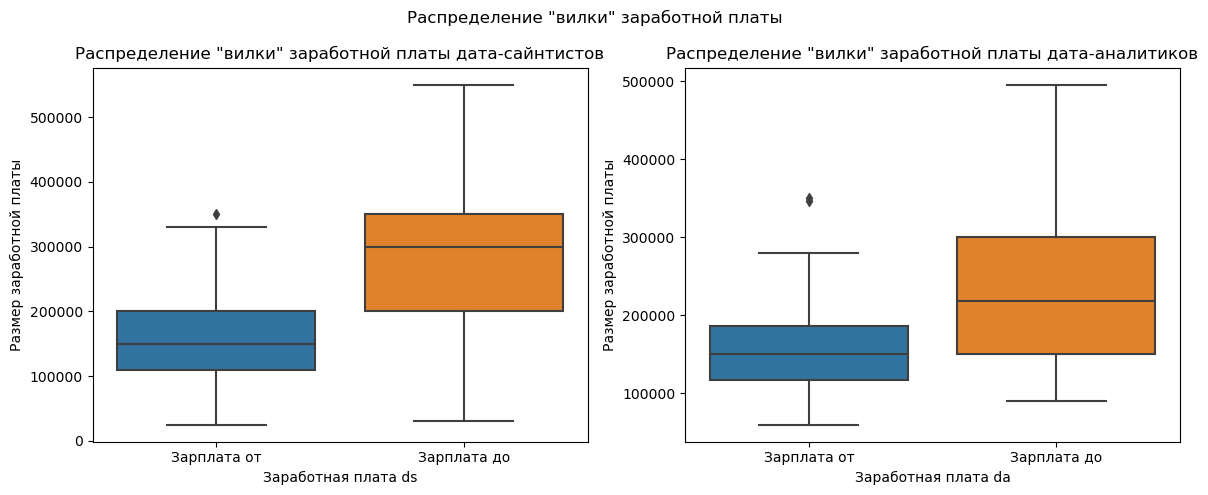

In [119]:
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
sns.boxplot(x='Заработная плата ds', y='Размер заработной платы', data=ds_melted, ax=axs[0]).set(title='Распределение "вилки" заработной платы дата-сайнтистов')
plt.title('Распределение "вилки" заработной платы дата-сайнтистов')
sns.boxplot(x='Заработная плата da', y='Размер заработной платы', data=da_melted, ax=axs[1]).set(title='Распределение "вилки" заработной платы дата-аналитиков')
fig.suptitle('Распределение "вилки" заработной платы')
fig.tight_layout()
plt.show();

Вывод: явные выбросы отсутствуют в обоих датафреймах. 

[к Оглавлению](#num0)

<a id="num6"></a>
# 6. Анализ данных

[к Оглавлению](#num0)

<a id="num61"></a>
## 6.1. Анализ данных по столбцу ``employer``

# --------------------------
### Здесь начинается блок кода, который использовался для создания функций data_dim и data_dim_top. Сохранил для истории и проверки правильности функций
# --------------------------

In [562]:
ds_emp = pd.pivot_table(ds, index='employer', values='id', aggfunc='count').sort_values(by='id', ascending=False).reset_index()
ds_emp.rename(columns={'employer':'Работодатель', 'id':'Кол-во вакансий'}, inplace=True)
ds_emp['Доля'] = ((ds_emp['Кол-во вакансий']/len(ds))*100).round(2)
ds_emp

,Работодатель,Кол-во вакансий,Доля
0,СБЕР,132,19.94
1,Ozon,20,3.02
2,Газпромбанк,17,2.57
3,Samokat.tech,16,2.42
4,Банк ВТБ (ПАО),12,1.81
...,...,...,...
239,МКК Срочноденьги,1,0.15
240,RedCat,1,0.15
241,МФК ВЭББАНКИР,1,0.15
242,Марс,1,0.15


In [563]:
top_n = 14
if top_n < len(ds):
    top_n = top_n
else:
    top_n = len(ds)
top_rows = ds_emp.nlargest(top_n, 'Кол-во вакансий')
other_rows = pd.DataFrame({'Работодатель': ['Прочие'], 'Кол-во вакансий': [ds_emp['Кол-во вакансий'].iloc[top_n:].sum()], 'Доля': [ds_emp['Доля'].iloc[top_n:].sum()]})
ds_emp_result = pd.concat([top_rows, other_rows], axis = 0)
ds_emp_result

,Работодатель,Кол-во вакансий,Доля
0,СБЕР,132,19.94
1,Ozon,20,3.02
2,Газпромбанк,17,2.57
3,Samokat.tech,16,2.42
4,Банк ВТБ (ПАО),12,1.81
5,Lamoda Tech,11,1.66
6,WILDBERRIES,11,1.66
7,Ростелеком,10,1.51
8,билайн,9,1.36
9,Т1,9,1.36


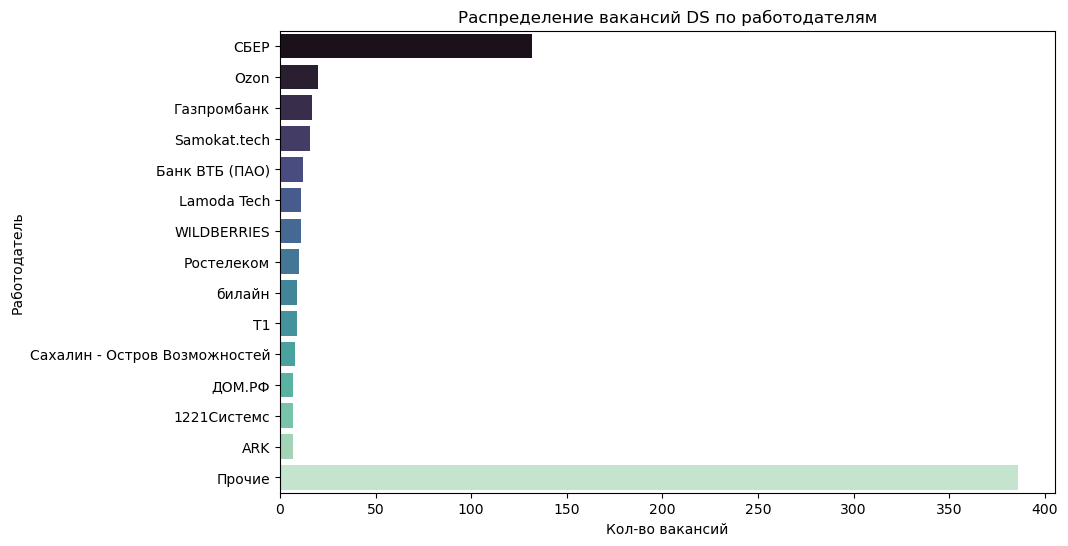

In [564]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=ds_emp_result, x='Кол-во вакансий', y='Работодатель', palette='mako')
plt.title('Распределение вакансий DS по работодателям');

# --------------------------
### Здесь заканчивается блок кода, который использовался для создания функций data_dim и data_dim_top. Сохранил для истории и проверки правильности функций
# --------------------------

In [120]:
ds_emp_result = data_dim_top (ds, 15, ['employer'])
ds_emp_result

,employer,Кол-во вакансий,Доля
0,сбер,132,19.94
1,ozon,20,3.02
2,газпромбанк,17,2.57
3,samokat.tech,16,2.42
4,банк втб (пао),12,1.81
5,lamoda tech,11,1.66
6,wildberries,11,1.66
7,ростелеком,10,1.51
8,т1,9,1.36
9,билайн,9,1.36


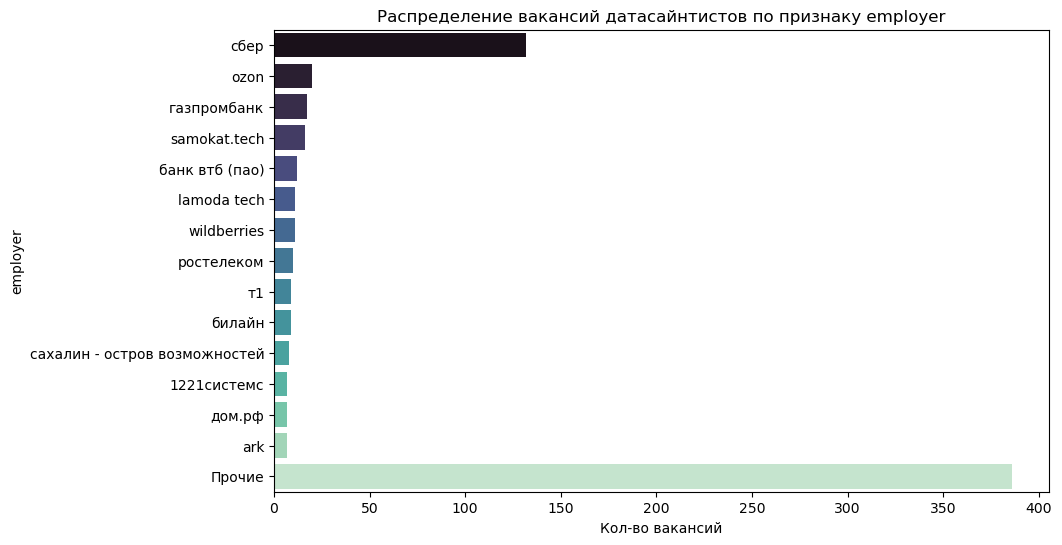

In [121]:
ds_plot (ds_emp_result)

In [122]:
da_emp_result = data_dim_top (da, 15, ['employer'])
da_emp_result

,employer,Кол-во вакансий,Доля
0,сбер,67,21.61
1,wildberries,14,4.52
2,мтс,7,2.26
3,okko,6,1.94
4,"магнит, розничная сеть",6,1.94
5,центр финансовых технологий,6,1.94
6,псб (пао «промсвязьбанк»),5,1.61
7,«uzum technologies».,5,1.61
8,maxim technology,4,1.29
9,studyworld,4,1.29


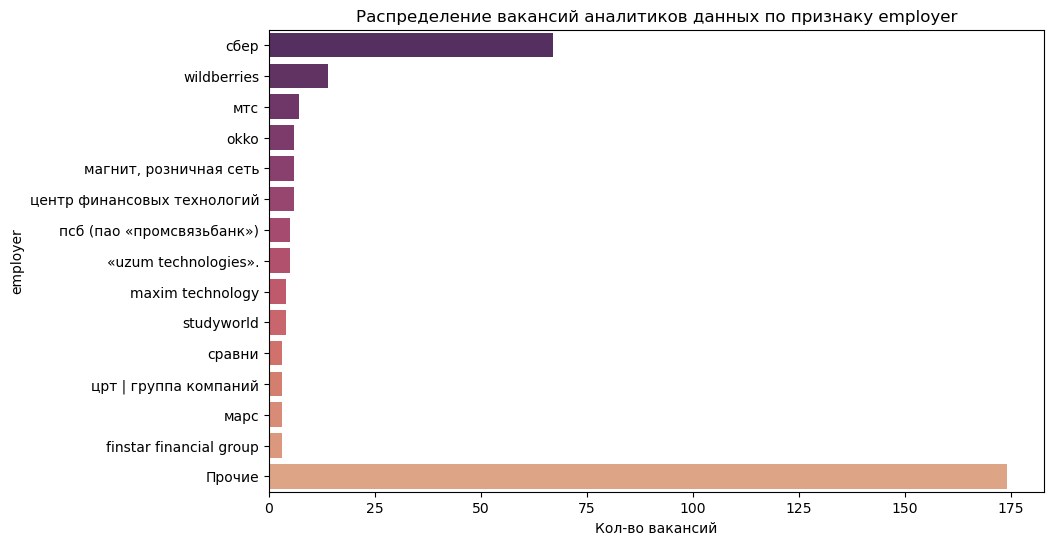

In [123]:
da_plot (da_emp_result)

[к Оглавлению](#num0)

<a id="num62"></a>
## 6.2.  Анализ данных по столбцу ``area``

In [124]:
ds_area = data_dim_top(ds, 10, dimention=['area'])
ds_area

,area,Кол-во вакансий,Доля
0,москва,513,77.49
1,санкт-петербург,66,9.97
2,новосибирск,15,2.27
3,нижний новгород,15,2.27
4,казань,12,1.81
5,екатеринбург,11,1.66
6,краснодар,4,0.60
7,томск,4,0.60
8,воронеж,3,0.45
9,Прочие,19,2.85


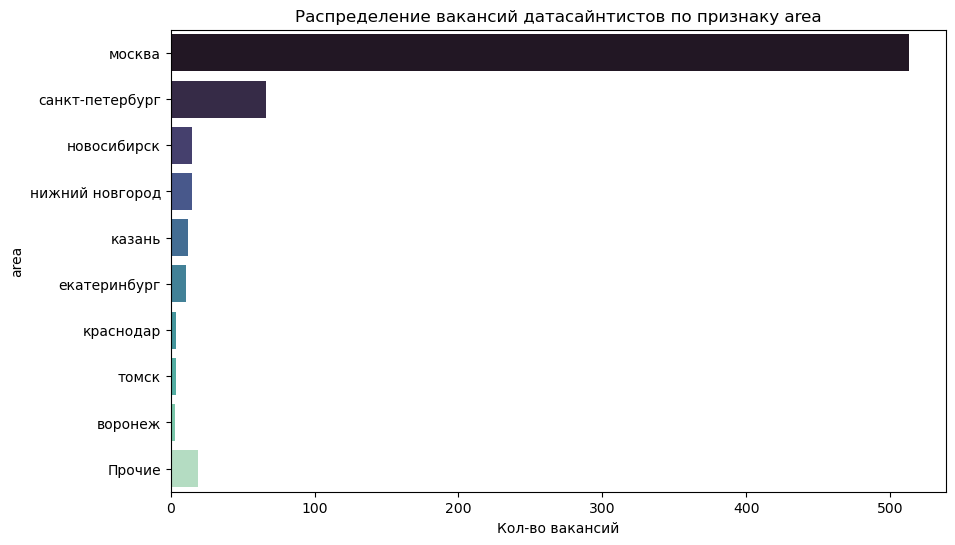

In [125]:
ds_plot(ds_area)

In [131]:
da_area = data_dim_top(da, 10, dimention=['area'])
da_area

,area,Кол-во вакансий,Доля
0,Москва,240,77.42
1,Санкт-Петербург,37,11.94
2,Екатеринбург,6,1.94
3,Новосибирск,4,1.29
4,Краснодар,3,0.97
5,Казань,3,0.97
6,Ростов-на-Дону,3,0.97
7,Самара,2,0.65
8,Владивосток,2,0.65
9,Прочие,10,3.20


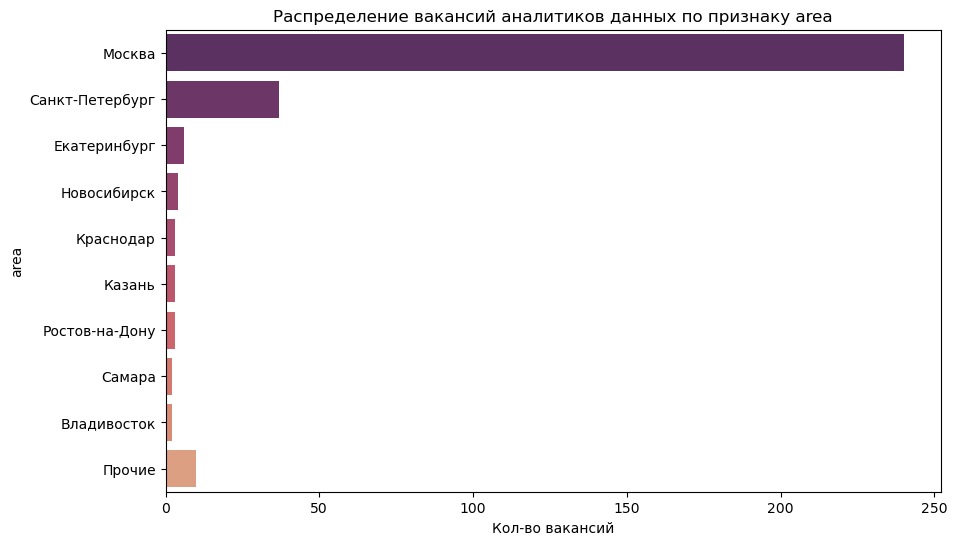

In [132]:
da_plot(da_area)

[к Оглавлению](#num0)

<a id="num63"></a>
## 6.3.  Анализ данных по столбцу ``experience``

In [105]:
ds_experience = data_dim_top (ds, 9, dimention=['experience'])
ds_experience

,experience,Кол-во вакансий,Доля
0,Middle (3-6 years),324,48.94
1,Junior+ (1-3 years),289,43.66
2,Junior (no experince),26,3.93
3,Senior (6+ years),23,3.47


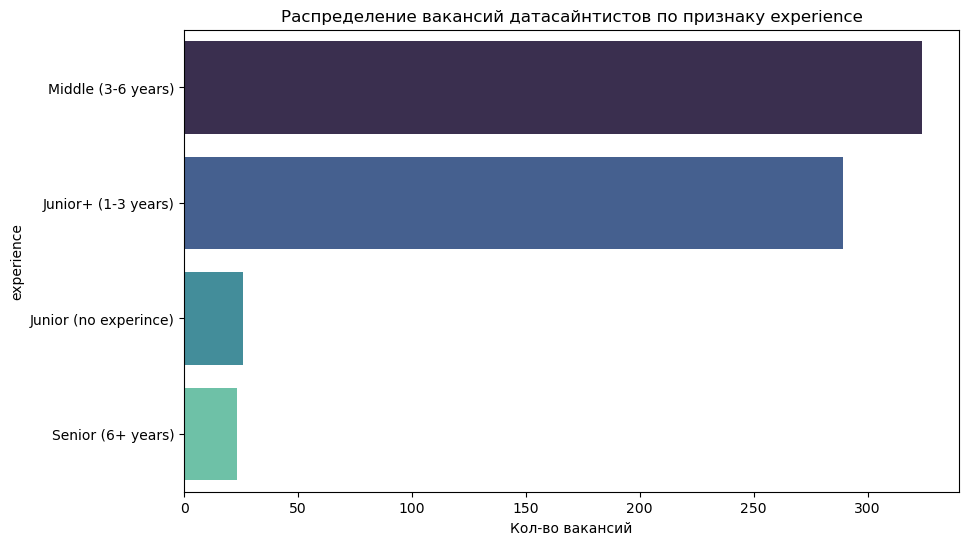

In [133]:
ds_plot(ds_experience)

In [134]:
da_experience = data_dim_top (da, 9, dimention=['experience'])
da_experience

,experience,Кол-во вакансий,Доля
0,Junior+ (1-3 years),178,57.42
1,Middle (3-6 years),120,38.71
2,Junior (no experince),9,2.90
3,Senior (6+ years),3,0.97


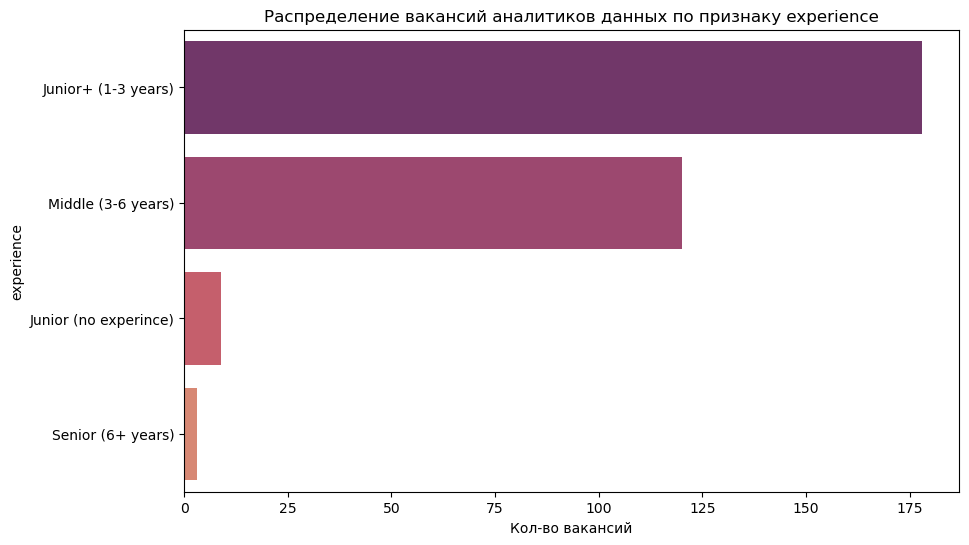

In [135]:
da_plot(da_experience)

In [29]:
da.loc[da['experience'] == 'Senior (6+ years)', 'salary_from'].mean()

nan

[к Оглавлению](#num0)

<a id="num64"></a>
## 6.4.  Анализ данных по столбцу ``key_skills_edited``

#### Столбец ``key_skills`` содержит много неявных дубликатов, поэтому работать будем со столбцом ``key_skills_edited``

In [313]:
ds['key_skills_edited']=ds['key_skills_edited'].str.replace(', ', ',')
da['key_skills_edited']=da['key_skills_edited'].str.replace(', ', ',')

In [314]:
skills_ds = ds['key_skills_edited'].str.strip().str.split(',', expand=True).stack().reset_index()
skills_ds.rename(columns={0:'ds_skills'}, inplace=True)
skills_ds.drop(['level_0', 'level_1'], axis= 1 , inplace= True )
skills_ds['ds_skills'] = skills_ds['ds_skills'].str.replace(']', '')
skills_ds['ds_skills'] = skills_ds['ds_skills'].str.replace('[', '')
skills_ds['counter'] = 1
skills_ds.head()

,ds_skills,counter
0,'it',1
1,'разработка по поисковых технологий',1
2,'data science',1
3,'python',1
4,'управление рисками',1


In [315]:
skills_ds['ds_skills'].tolist()

["'it'",
 "'разработка по поисковых технологий'",
 "'data science'",
 "'python'",
 "'управление рисками'",
 "'управление рисками'",
 "'powerpoint'",
 "'pandas",
 'lgenerative design',
 "ead'",
 "'управление рисками'",
 "'математическая статистика и теория вероятностей'",
 "'управление рисками'",
 "'математическое моделирование'",
 "'sql'",
 "'machine learning'",
 "'проведение презентаций'",
 "'writing articles'",
 "'research'",
 "'юнит-экономика'",
 "'it'",
 "'data mining'",
 "'английский язык'",
 "'machine learning'",
 "'проведение презентаций'",
 "'проведение презентаций'",
 "'writing articles'",
 "'research'",
 "'юнит-экономика'",
 "'it'",
 "'data mining'",
 "'английский язык'",
 "'machine learning'",
 "'проведение презентаций'",
 "'проведение презентаций'",
 "'writing articles'",
 "'research'",
 "'юнит-экономика'",
 "'it'",
 "'data mining'",
 "'английский язык'",
 "'php'",
 "'spark'",
 "'базы данных'",
 "'python'",
 "'elasticsearch'",
 "'scala'",
 "'typescript'",
 "'sql'",
 "'click

In [316]:
skills_ds_pvt = pd.pivot_table(data=skills_ds, index='ds_skills', values='counter', aggfunc='sum').sort_values(by='counter', ascending=False).reset_index()
skills_ds_pvt = skills_ds_pvt.loc[skills_ds_pvt['ds_skills'] !='', :]
skills_ds_pvt=skills_ds_pvt.head(10)
skills_ds_pvt

,ds_skills,counter
0,'python',292
1,'pandas',259
2,'sql',223
3,'machine learning',216
5,'оформление документаци',111
6,'data analysis',105
7,'математическая статистика и теория вероятностей',86
8,'коммуникативные навыки',74
9,'data science',70
10,'natural language processing',61


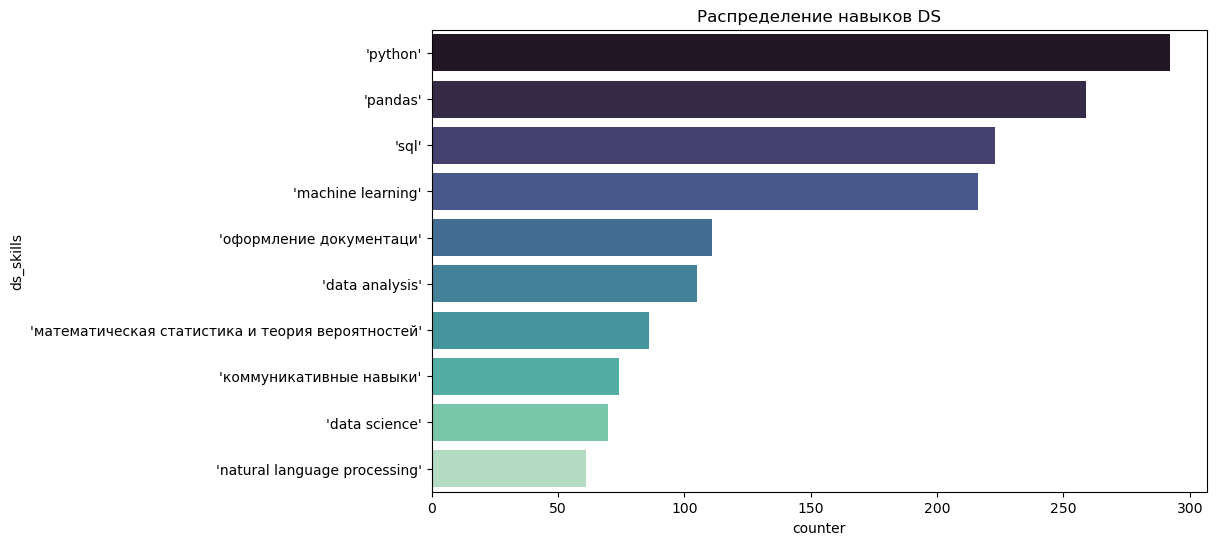

In [317]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=skills_ds_pvt, x='counter', y='ds_skills', palette='mako')
plt.title('Распределение навыков DS');

In [318]:
skills_da = da['key_skills_edited'].str.strip().str.split(',', expand=True).stack().reset_index()
skills_da.rename(columns={0:'da_skills'}, inplace=True)
skills_da.drop(['level_0', 'level_1'], axis= 1 , inplace= True )
skills_da['da_skills'] = skills_da['da_skills'].str.replace(']', '')
skills_da['da_skills'] = skills_da['da_skills'].str.replace('[', '')
skills_da['da_skills'] = skills_da['da_skills'].str.replace("'", '')
skills_da['counter'] = 1
skills_da.head()

,da_skills,counter
0,http,1
1,pandas,1
2,linux,1
3,git,1
4,clickhouse,1


In [322]:
skills_da_pvt = pd.pivot_table(data=skills_da, index='da_skills', values='counter', aggfunc='sum').sort_values(by='counter', ascending=False).reset_index()
skills_da_pvt = skills_da_pvt.loc[skills_da_pvt['da_skills'] !='', :]
skills_da_pvt=skills_da_pvt.head(10)
skills_da_pvt

,da_skills,counter
0,sql,198
1,data analysis,141
2,python,129
3,pandas,88
5,ms power bi,48
6,оформление документаци,45
7,аналитическое мышление,44
8,коммуникативные навыки,35
9,базы данных,31
10,atlassian confluence,28


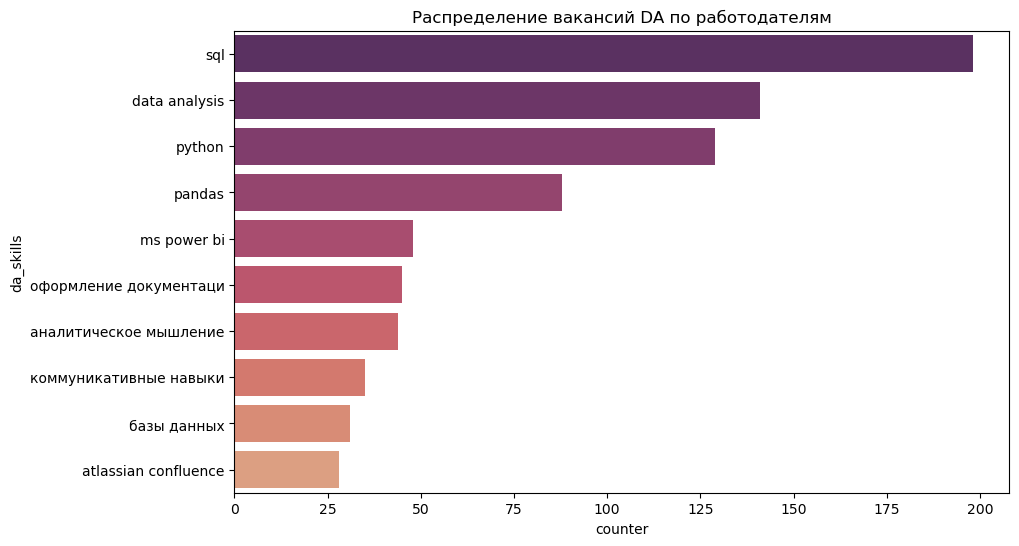

In [323]:
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=skills_da_pvt, x='counter', y='da_skills', palette='flare_r')
plt.title('Распределение вакансий DA по работодателям');

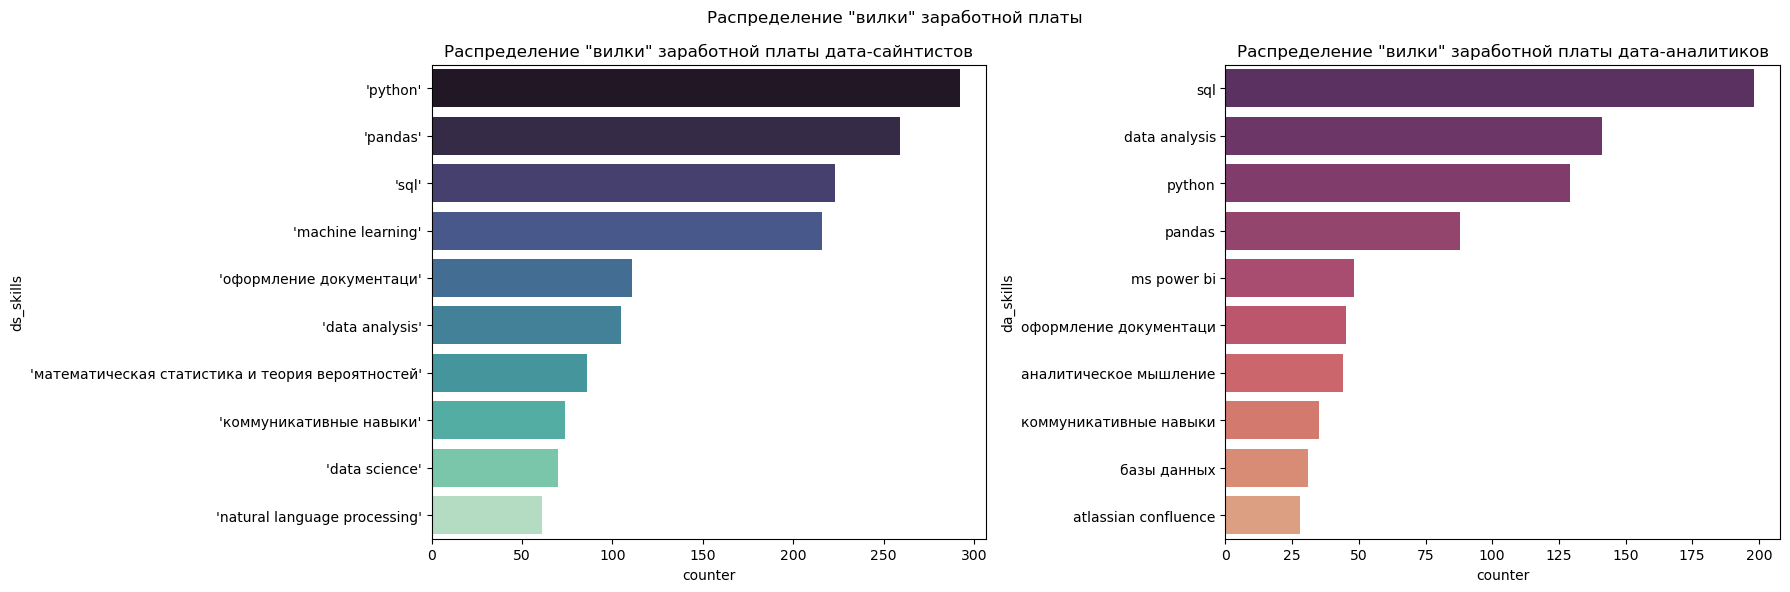

In [328]:
fig, axs = plt.subplots(1, 2, figsize=(18, 6))
sns.barplot(data=skills_ds_pvt, x='counter', y='ds_skills', palette='mako', ax=axs[0]).set(title='Распределение "вилки" заработной платы дата-сайнтистов')
plt.title('Распределение "вилки" заработной платы дата-сайнтистов')
sns.barplot(data=skills_da_pvt, x='counter', y='da_skills', palette='flare_r', ax=axs[1]).set(title='Распределение "вилки" заработной платы дата-аналитиков')
fig.suptitle('Распределение "вилки" заработной платы')
fig.tight_layout()
plt.show();

[к Оглавлению](#num0)

<a id="num65"></a>
## 6.5.  Анализ данных по столбцу ``schedule``

In [137]:
ds_schedule = data_dim_top(ds, 10, dimention=['schedule'])
ds_schedule

,schedule,Кол-во вакансий,Доля
0,Полный день,508,76.74
1,Удаленная работа,119,17.98
2,Гибкий график,32,4.83
3,Сменный график,3,0.45


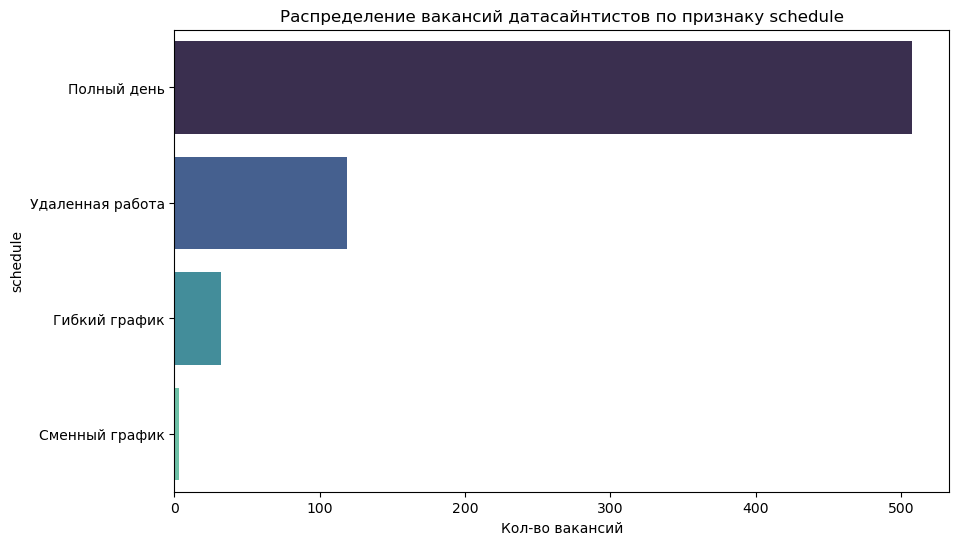

In [138]:
ds_plot(ds_schedule)

In [139]:
da_schedule = data_dim_top(da, 10, dimention=['schedule'])
da_schedule

,schedule,Кол-во вакансий,Доля
0,Полный день,236,76.13
1,Удаленная работа,63,20.32
2,Гибкий график,7,2.26
3,Сменный график,4,1.29


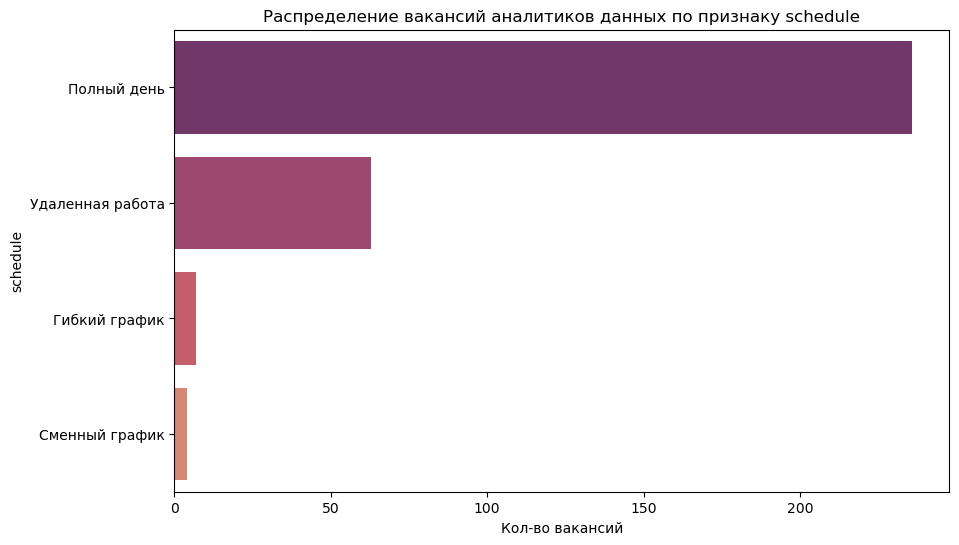

In [140]:
da_plot(da_schedule)

[к Оглавлению](#num0)

<a id="num66"></a>
## 6.6.  Анализ данных по столбцу ``employment``

In [141]:
ds_employment = data_dim_top(ds, 10, dimention=['employment'])
ds_employment

,employment,Кол-во вакансий,Доля
0,Полная занятость,646,97.58
1,Стажировка,12,1.81
2,Проектная работа,2,0.30
3,Частичная занятость,2,0.30


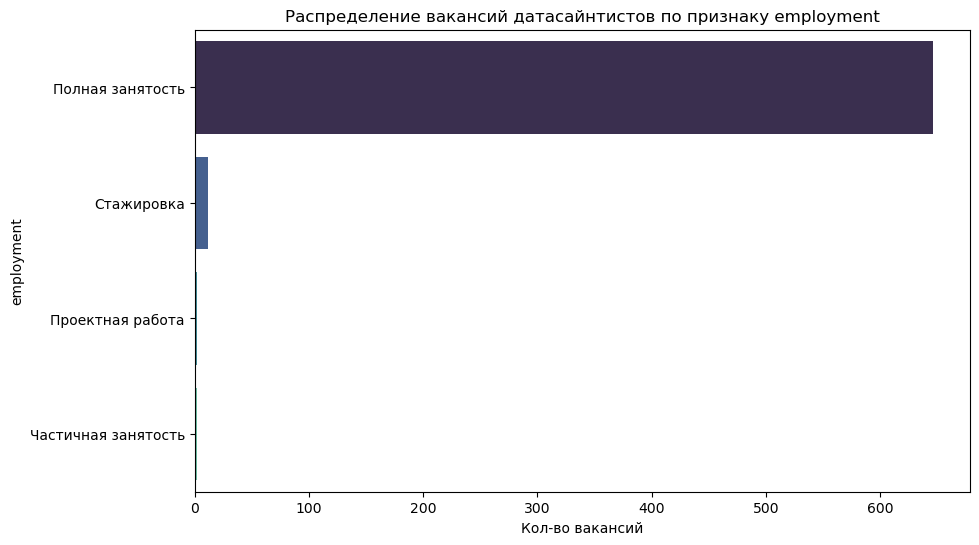

In [142]:
ds_plot(ds_employment)

In [143]:
da_employment = data_dim_top(da, 10, dimention=['employment'])
da_employment

,employment,Кол-во вакансий,Доля
0,Полная занятость,308,99.35
1,Частичная занятость,2,0.65


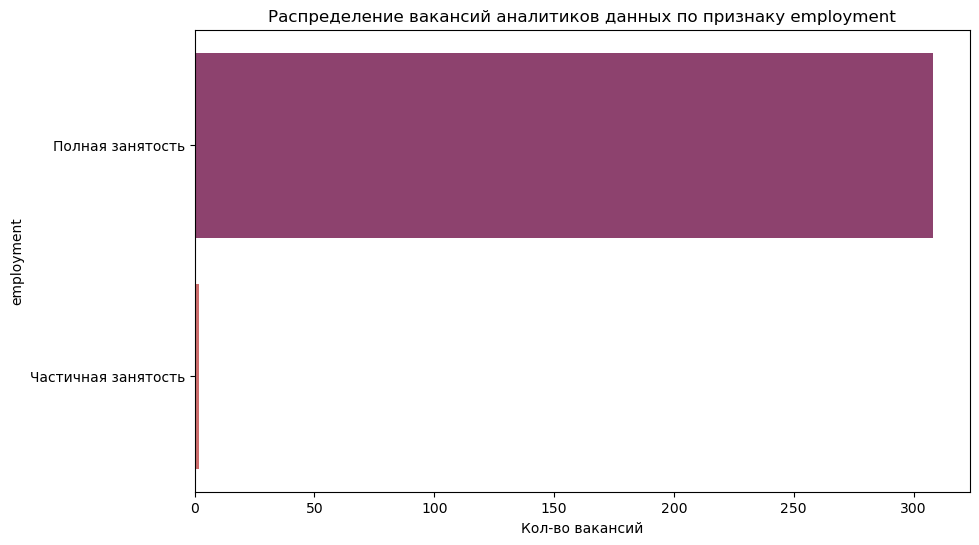

In [144]:
da_plot(da_employment)

[к Оглавлению](#num0)

<a id="num67"></a>
## 6.7.  Анализ данных по столбцу ``salary`` и ``salary_bin``

<a id="num671"></a>
## 6.7.1.  Анализ данных по столбцу ``salary`` и ``salary_bin`` по грейдам

In [72]:
ds_sal_avg = pd.pivot_table(data=ds, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'experience', 
                        aggfunc={'salary_from':'mean', 'salary_to':'mean'})
ds_sal_avg = ds_sal_avg.round(decimals=2)
ds_sal_avg

,salary_from,salary_to
experience,,
junior (no experince),47500.00,80000.00
junior+ (1-3 years),131000.00,234642.86
middle (3-6 years),205574.07,298922.92
senior (6+ years),160000.00,346666.67


In [71]:
ds_sal_median = pd.pivot_table(data=ds, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'experience', 
                        aggfunc={'salary_from':'median', 'salary_to':'median'})
ds_sal_median = ds_sal_median.round(decimals=2)
ds_sal_median

,salary_from,salary_to
experience,,
junior (no experince),47500.0,80000.0
junior+ (1-3 years),130000.0,250000.0
middle (3-6 years),200000.0,300000.0
senior (6+ years),160000.0,300000.0


In [73]:
da_sal_avg = pd.pivot_table(data=da, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'experience', 
                        aggfunc={'salary_from':'mean', 'salary_to':'mean'})
da_sal_avg = da_sal_avg.round(decimals=2)
da_sal_avg

,salary_from,salary_to
experience,,
junior (no experince),60000.00,NaN
junior+ (1-3 years),143050.00,184066.67
middle (3-6 years),238064.29,350220.00


In [74]:
da_sal_median = pd.pivot_table(data=da, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'experience', 
                        aggfunc={'salary_from':'median', 'salary_to':'median'})
da_sal_median = da_sal_median.round(decimals=2)
da_sal_median

,salary_from,salary_to
experience,,
junior (no experince),60000.0,NaN
junior+ (1-3 years),150000.0,200000.0
middle (3-6 years),200000.0,375000.0


In [76]:
da_sal_median = pd.pivot_table(data=da, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'experience', 
                        aggfunc={'salary_from':['mean', 'median'],'salary_to':['mean','median']})
da_sal_median = da_sal_median.round(decimals=2)
da_sal_median

salary_from            salary_to          
                             mean    median       mean    median
experience                                                      
junior (no experince)    60000.00   60000.0        NaN       NaN
junior+ (1-3 years)     143050.00  150000.0  184066.67  200000.0
middle (3-6 years)      238064.29  200000.0  350220.00  375000.0

[к Оглавлению](#num0)

<a id="num672"></a>
## 6.7.2.  Анализ данных по столбцу ``salary`` и ``salary_bin`` по городам

In [70]:
ds_sal_area = pd.pivot_table(data=ds, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'area', 
                        aggfunc={'salary_from':'mean', 'salary_to':'mean'}).sort_values(by='salary_from', ascending=False)
#ds_sal_area['salary_from'] = np.ceil(ds_sal_area['salary_from'])
#ds_sal_area['salary_to'] = np.ceil(ds_sal_area['salary_to'])
ds_sal_area=ds_sal_area.round(decimals=2)
ds_sal_area

,salary_from,salary_to
area,,
москва,191833.33,303247.14
санкт-петербург,171687.50,175062.50
владивосток,150000.00,200000.00
ярославль,150000.00,200000.00
новосибирск,111166.67,272562.50
ижевск,110000.00,200000.00
нижний новгород,88000.00,130000.00
воронеж,70000.00,80000.00
верхняя пышма,50000.00,70000.00


In [48]:
da_sal_area = pd.pivot_table(data=da, 
                        values = ['salary_from', 'salary_to'], 
                        index = 'area', 
                        aggfunc={'salary_from':'mean', 'salary_to':'mean'}).sort_values(by='salary_from', ascending=False)
da_sal_area

,salary_from,salary_to
area,,
воронеж,350000.0,400000.0
нижний новгород,190000.0,NaN
москва,165372.5,259160.0
санкт-петербург,147500.0,170000.0
владивосток,75000.0,NaN


In [218]:
ds['salary_bin'].value_counts()

salary_bin
ЗП не указана                606
Больше 300 тысяч              29
От 200 тысяч до 300 тысяч     14
От 100 тысяч до 200 тысяч      8
Меньше 100 тысяч               5
Name: count, dtype: int64

In [49]:
da['salary_bin'].value_counts()

salary_bin
зп не указана                285
от 200 тысяч до 300 тысяч     11
больше 300 тысяч               7
от 100 тысяч до 200 тысяч      6
меньше 100 тысяч               1
Name: count, dtype: int64

#### Особого смысла анализировать этот показатель нет

[к Оглавлению](#num0)

<a id="num68"></a>
## 6.8.  Анализ данных по столбцу ``name``

In [55]:
ds_name = data_dim_top(ds, 15, dimention=['name'])
ds_name

,name,Кол-во вакансий,Доля
0,data scientist,107,16.16
1,senior data scientist,26,3.93
2,middle data scientist,12,1.81
3,data scientist (middle),10,1.51
4,senior data scientist (nlp),7,1.06
5,junior data scientist,7,1.06
6,data scientist (middle) с переездом в южно-сах...,6,0.91
7,дата аналитик (data scientist),6,0.91
8,data scientist (nlp),6,0.91
9,бизнес-аналитик со знанием sql (удаленно)/data...,6,0.91


In [50]:
da_name = data_dim_top(da, 15, dimention=['name'])
da_name

,name,Кол-во вакансий,Доля
0,data analyst,70,22.58
1,аналитик данных / data analyst,13,4.19
2,senior data analyst,11,3.55
3,junior data analyst,8,2.58
4,data analyst / аналитик данных,7,2.26
5,дата аналитик (data scientist),6,1.94
6,middle data analyst,6,1.94
7,аналитик данных (data analyst),5,1.61
8,data analyst/аналитик данных,4,1.29
9,lead data analyst,4,1.29


In [53]:
da['name'] = da['name'].replace(['аналитик данных/data analyst', 
                                 'data analyst/аналитик данных', 
                                 'аналитик данных (data analyst)', 
                                 'data analyst / аналитик данных', 
                                 'аналитик данных / data analyst', 
                                 'аналитик данных (data analyst)', 
                                 'дата аналитик'], 'data analyst', regex=True)

In [56]:
da_name = data_dim_top(da, 15, dimention=['name'])
da_name

,name,Кол-во вакансий,Доля
0,data analyst,99,31.94
1,senior data analyst,11,3.55
2,junior data analyst,8,2.58
3,data analyst (data scientist),6,1.94
4,middle data analyst,6,1.94
5,аналитик данных (data analyst),5,1.61
6,lead data analyst,4,1.29
7,financial data analyst,3,0.97
8,data engineer/data analyst,3,0.97
9,аналитик power bi / data analyst,2,0.65


Фактически, HRы закладывали в название дополнительные отличительные признаки своей вакансии. Не будем к ним строги

[к Оглавлению](#num0)

<a id="num69"></a>
## 6.9.  Анализ данных по столбцу ``published_at``

In [197]:
ds_pub_date = data_dim(ds, dimention=['publication_date'])
ds_pub_date.head(2)

,publication_date,Кол-во вакансий,Доля
0,2024-04-15,43,6.50
1,2024-04-22,33,4.98


In [195]:
da_pub_date = data_dim(da, dimention=['publication_date'])
da_pub_date.head(2)

,publication_date,Кол-во вакансий,Доля
0,2024-04-24,15,4.84
1,2024-04-22,15,4.84


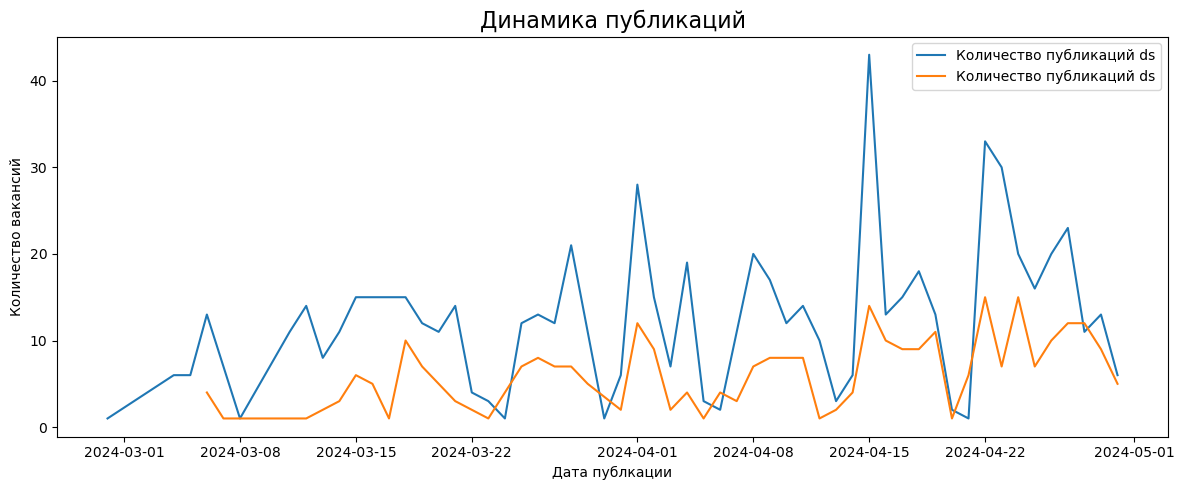

In [208]:
fig = plt.figure(figsize=(12, 5))

sns.lineplot(ds_pub_date, x='publication_date', y='Кол-во вакансий', palette='mako', label='Количество публикаций ds')
sns.lineplot(da_pub_date, x='publication_date', y='Кол-во вакансий', palette='flare_r', label='Количество публикаций ds')
plt.legend()

plt.title('Динамика публикаций', fontsize=16)
plt.xlabel('Дата публкации')
plt.ylabel('Количество вакансий')

fig.tight_layout()
plt.show()

[к Оглавлению](#num0)

<a id="num610"></a>
## 6.10.  Анализ данных по столбцу ``department``

In [209]:
#da_name = data_dim_top(da, 15, dimention=['name'])
ds_pub_dep = data_dim(ds, dimention=['employer', 'department'])
ds_pub_dep.head()

,employer,department,Кол-во вакансий,Доля
0,сбер,сбер для экспертов,95,14.35
1,сбер,сбер. data science,23,3.47
2,ozon,ozon информационные технологии,20,3.02
3,газпромбанк,газпромбанк,17,2.57
4,сбер,сбер. it,14,2.11


In [210]:
da_pub_dep = data_dim(da, dimention=['employer', 'department'])
da_pub_dep.head()

,employer,department,Кол-во вакансий,Доля
0,сбер,сбер для экспертов,51,16.45
1,сбер,сбер. data science,12,3.87
2,мтс,"«мтс», digital",7,2.26
3,псб (пао «промсвязьбанк»),"пао «промсвязьбанк», бизнес и инфраструктура",5,1.61
4,сбер,сбер. it,4,1.29


#### К сожалению, данные малоинформативны. И для вакансий ds, и для вакансий da много пересечений среди отделов

[к Оглавлению](#num0)

<a id="num611"></a>
## 6.11.  Анализ данных по столбцу ``type``

In [216]:
da_pub_type = data_dim(da, dimention=['type'])
da_pub_type

,type,Кол-во вакансий,Доля
0,Открытая,310,100.0


In [217]:
ds_pub_type = data_dim(ds, dimention=['type'])
ds_pub_type

,type,Кол-во вакансий,Доля
0,Открытая,662,100.0


#### Все вакансии открыты

[к Оглавлению](#num0)

<a id="num7"></a>
## 7.  Выводы

[к Оглавлению](#num0)

<a id="num8"></a>
## 7.  Дополнительная информация. Презентация

Данные, код и презентация находятся по ссылке https://github.com/kurenovk/DS-DA_vacancies

[к Оглавлению](#num0)

# ----------------------------------- Дальше не идем

<a id="num612"></a>
## 6.12.  Анализ данных по столбцу ``key_skills_from_key_skills_field``

In [ ]:
key_skills_from_key_skills_field - 
* hard_skills_from_description - 
* soft_skills_from_description - 

In [219]:
da_key_skills_from_key_skills = data_dim_top(da, 20, dimention=['key_skills_from_key_skills_field'])
da_key_skills_from_key_skills

,key_skills_from_key_skills_field,Кол-во вакансий,Доля
0,"SQL, Python",5,1.61
1,"Python, SQL, A/B тесты",5,1.61
2,"SQL, Python, A/B тесты",4,1.29
3,"Математический анализ, Математическая статисти...",4,1.29
4,"Python, SQL",4,1.29
5,"SQL, VBA, MS SQL, Управленческая отчетность, M...",2,0.65
6,"SQL, Python, Data Analysis, Power BI",2,0.65
7,"SQL, Python, Power BI, Математическая статисти...",2,0.65
8,"Power BI, MS Power BI, SQL, Python, Аналитичес...",2,0.65
9,"UML, BPMN, Oracle DB, Oracle Exadata, PostgreS...",2,0.65


[к Оглавлению](#num0)

<a id="num613"></a>
## 6.13.  Анализ данных по столбцу ``hard_skills_from_description``

In [220]:
da_hardskills = data_dim_top(da, 20, dimention=['hard_skills_from_description'])
da_hardskills

,hard_skills_from_description,Кол-во вакансий,Доля
0,Pandas,72,23.23
1,confluence,20,6.45
2,Юнит-экономика,11,3.55
3,"Pandas, confluence",8,2.58
4,"Pandas, Google Sheets",1,0.32


<a id="num614"></a>
## 6.14.  Анализ данных по столбцу ``soft_skills_from_description``

In [221]:
da_softskills = data_dim_top(da, 20, dimention=['soft_skills_from_description'])
da_softskills

,soft_skills_from_description,Кол-во вакансий,Доля
0,Документация,29,9.35
1,Коммуникация,18,5.81
2,"Коммуникация, Документация",10,3.23
3,Аналитическое мышление,9,2.90
4,Принятие решений,3,0.97
5,"Проактивность, Аналитическое мышление",3,0.97
6,"Документация, Переговоры",2,0.65
7,"Коммуникация, Документация, Переговоры",2,0.65
8,Креативность,2,0.65
9,Проактивность,2,0.65


In [179]:
# Example DataFrame
data = {'column_with_lists': [['apple', 'banana', 'apple'], ['orange', 'banana'], ['apple', 'orange']]}
df = pd.DataFrame(data)

# Explode the lists into separate rows
df_exploded = df.explode('column_with_lists')

# Count the occurrences
occurrences = df_exploded['column_with_lists'].value_counts()

print(occurrences)

column_with_lists
apple     3
banana    2
orange    2
Name: count, dtype: int64


In [185]:
occurrences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   3 non-null      object
 1   count   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [181]:
data = {'column_with_lists': [['apple', 'banana', 'apple'], ['orange', 'banana'], ['apple', 'orange']]}
df = pd.DataFrame(data)
df

,column_with_lists
0,"[apple, banana, apple]"
1,"[orange, banana]"
2,"[apple, orange]"


In [182]:
df_exploded = df.explode('column_with_lists')
df_exploded

,column_with_lists
0,apple
0,banana
0,apple
1,orange
1,banana
2,apple
2,orange


In [183]:
data = {'column_with_lists': [['apple', 'banana', 'apple'], ['orange', 'banana'], ['apple', 'orange']]}
df = pd.DataFrame(data)

# Explode the lists into separate rows
df_exploded = df.explode('column_with_lists')

# Count the occurrences
occurrences = df_exploded['column_with_lists'].value_counts().reset_index()

# Rename the columns
occurrences.columns = ['value', 'count']

print(occurrences)

    value  count
0   apple      3
1  banana      2
2  orange      2


In [184]:
occurrences.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   value   3 non-null      object
 1   count   3 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 180.0+ bytes


In [186]:
pivot_table = pd.pivot_table(data, index='index_column', columns='columns_column', values='values_column', margins=True, margins_name='Total')

# Remove the 'Total' row and column
pivot_table = pivot_table.drop('Total', axis=0)
pivot_table = pivot_table.drop('Total', axis=1)

# Plotting
pivot_table.plot(kind='bar')  # You can choose different plot types
plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.show()

KeyError: 'values_column'

In [187]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example Pivot Table
pivot_table = pd.pivot_table(data, index='index_column', columns='columns_column', values='values_column', margins=True, margins_name='Total')

# Remove the 'Total' row and column
pivot_table = pivot_table.drop('Total', axis=0)
pivot_table = pivot_table.drop('Total', axis=1)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=pivot_table.reset_index(), x='index_column', y='values_column', hue='columns_column')

# Add values to each bar
for p in plt.gca().patches:
    height = p.get_height()
    plt.gca().text(p.get_x() + p.get_width() / 2, height + 0.05, f'{height:.0f}', ha='center', va='bottom')

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend(title='Legend Title')
plt.show()

KeyError: 'values_column'

In [188]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example Pivot Table
pivot_table = pd.pivot_table(data, index='index_column', columns='columns_column', values='values_column', margins=True, margins_name='Total')

# Remove the 'Total' row and column
pivot_table = pivot_table.drop('Total', axis=0)
pivot_table = pivot_table.drop('Total', axis=1)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=pivot_table.reset_index(), x='index_column', y='values_column', hue='columns_column')

# Add values to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha="center", va="bottom", fontsize=10)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend(title='Legend Title')
plt.show()
In Matplotlib, ax.patches refers to a collection of graphical objects (patches) that make up the plot. For a bar plot, each patch represents a bar in the plot.

When you iterate over ax.patches, you can access each individual bar in the plot. This allows you to customize the properties of each bar, such as its height, width, position, color, etc.

In the code snippet provided earlier:In Matplotlib, ax.patches refers to a collection of graphical objects (patches) that make up the plot. For a bar plot, each patch represents a bar in the plot.

When you iterate over ax.patches, you can access each individual bar in the plot. This allows you to customize the properties of each bar, such as its height, width, position, color, etc.

In the code snippet provided earlier:

python

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha="center", va="bottom", fontsize=10)

ax.patches is being iterated over to access each bar (p), and then the height of each bar (p.get_height()) is used to add a text label above each bar indicating its value.


SyntaxError: invalid syntax (4000695327.py, line 26)

In [ ]:
# Sample DataFrame
data = {
    'Category': ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L'],
    'Value': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]
}
df = pd.DataFrame(data)

# Sort by value column and get top 9 rows
top_n = 9
top_rows = df.nlargest(top_n, 'Value')

# Replace remaining rows with "Others"
other_rows = pd.DataFrame({'Category': ['Others'], 'Value': [df['Value'].iloc[top_n:].sum()]})

# Concatenate top rows and "Others"
result = pd.concat([top_rows, other_rows])

print(result)

### Здесь я пытался приделать подписи значений к барам графика. Пока не вышло

In [ ]:
# Example Pivot Table
pivot_table = pd.pivot_table(data, index='index_column', columns='columns_column', values='values_column', margins=True, margins_name='Total')

# Remove the 'Total' row and column
pivot_table = pivot_table.drop('Total', axis=0)
pivot_table = pivot_table.drop('Total', axis=1)

# Plotting
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
ax = sns.barplot(data=pivot_table.reset_index(), x='index_column', y='values_column', hue='columns_column')

# Add values to each bar
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha="center", va="bottom", fontsize=10)

plt.xlabel('X-axis Label')
plt.ylabel('Y-axis Label')
plt.title('Title of the Plot')
plt.legend(title='Legend Title')
plt.show()
In Matplotlib, ax.patches refers to a collection of graphical objects (patches) that make up the plot. For a bar plot, each patch represents a bar in the plot.

When you iterate over ax.patches, you can access each individual bar in the plot. This allows you to customize the properties of each bar, such as its height, width, position, color, etc.

In the code snippet provided earlier:In Matplotlib, ax.patches refers to a collection of graphical objects (patches) that make up the plot. For a bar plot, each patch represents a bar in the plot.

When you iterate over ax.patches, you can access each individual bar in the plot. This allows you to customize the properties of each bar, such as its height, width, position, color, etc.

In the code snippet provided earlier:

python

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width() / 2., height, f'{height:.0f}', ha="center", va="bottom", fontsize=10)

ax.patches is being iterated over to access each bar (p), and then the height of each bar (p.get_height()) is used to add a text label above each bar indicating its value.
